In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import urllib
from geopy.distance import geodesic

### read data

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### check number of records

In [4]:
len(data)

48895

### Basic Stat Report from numeric Columns

In [5]:
data[["price","latitude","longitude","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]].describe()

price      latitude     longitude  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean     152.720687     40.728949    -73.952170        7.029962   
std      240.154170      0.054530      0.046157       20.510550   
min        0.000000     40.499790    -74.244420        1.000000   
25%       69.000000     40.690100    -73.983070        1.000000   
50%      106.000000     40.723070    -73.955680        3.000000   
75%      175.000000     40.763115    -73.936275        5.000000   
max    10000.000000     40.913060    -73.712990     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

### Check Null Data

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Data Cleaning
clean records with price = 0

In [8]:
data = data[data['price']>0]
data.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [9]:
data['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
len(data)

48884

### find outlier records in price
if 
\begin{equation*}
data > mean + 3*std 
\end{equation*}
we know it as outlier

In [11]:
data1 = data[data['price']<= data['price'].mean() + 3*data['price'].std()]
data1.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [12]:
len(data1)

48496

In [13]:
data1.price.describe()

count    48496.000000
mean       138.778373
std        107.550128
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64

In [28]:
data1.groupby('neighbourhood_group')['id'].agg(['count'])

count
neighbourhood_group       
Bronx                 1088
Brooklyn             20011
Manhattan            21377
Queens                5650
Staten Island          370

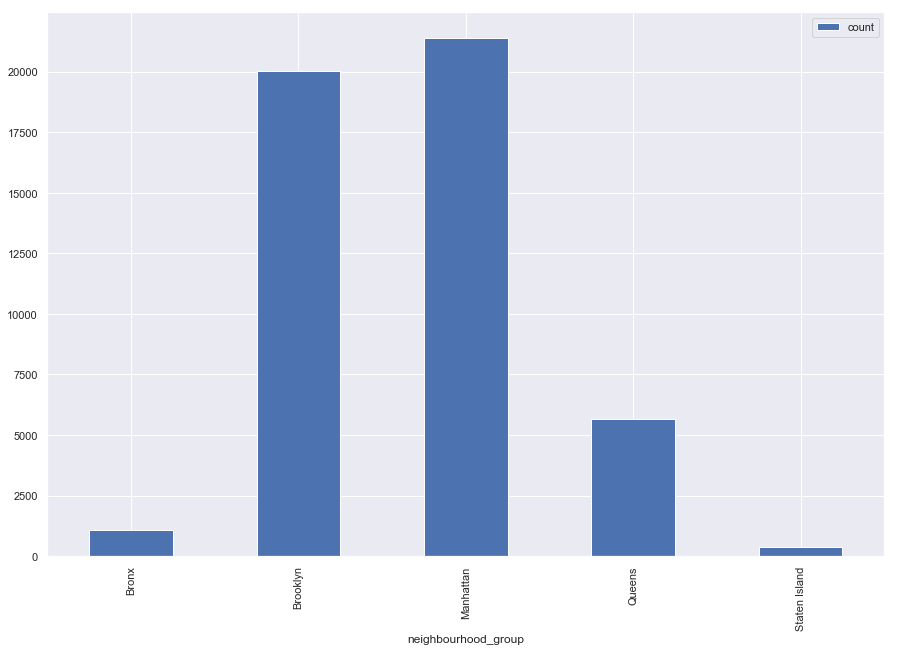

In [29]:
data1.groupby('neighbourhood_group')['id'].agg(['count']).plot(kind="bar")

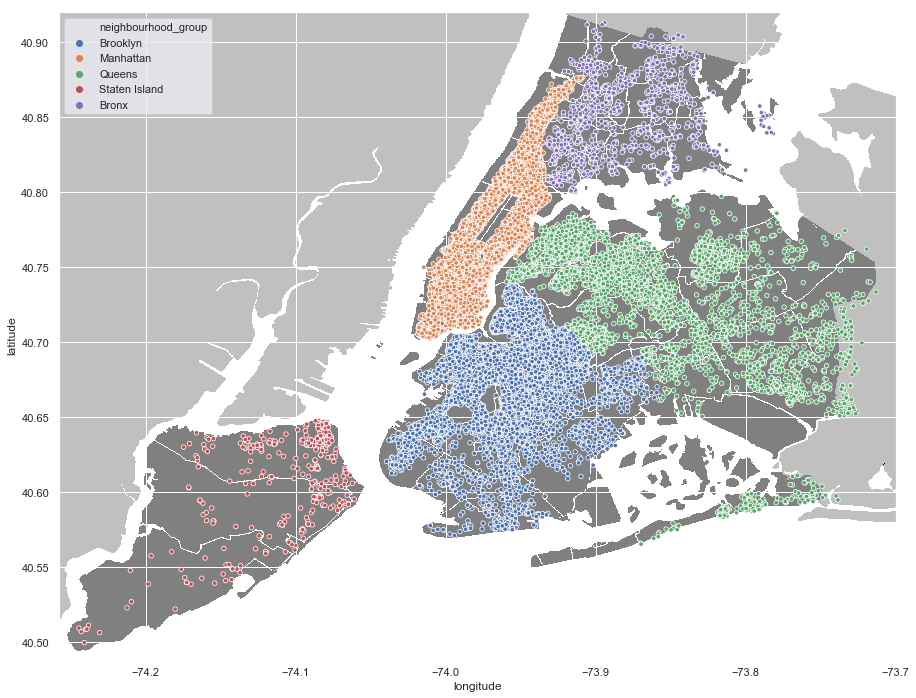

In [30]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data1['longitude'], y=data1['latitude'], hue='neighbourhood_group',s=20, data=data1)
plt.legend()
plt.show()

### check distribution of price

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


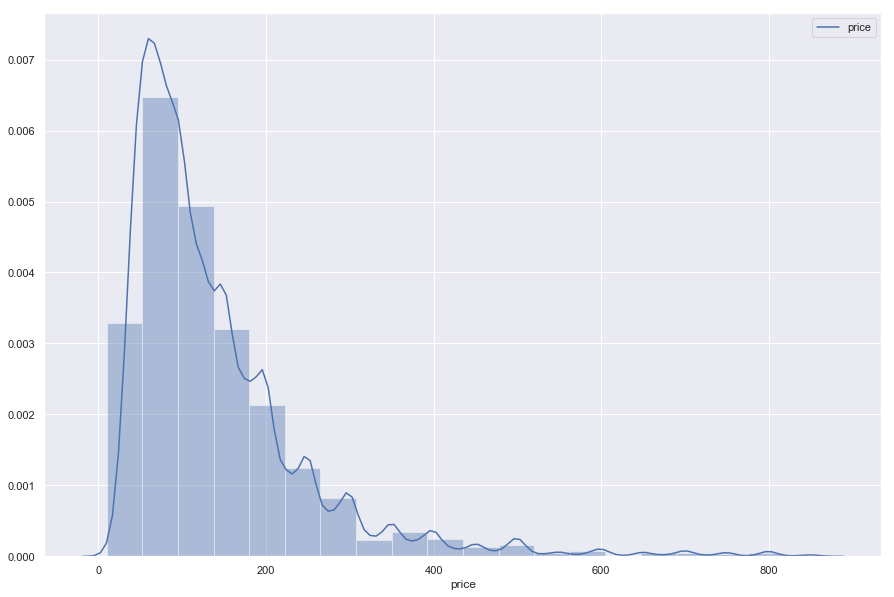

In [14]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price'],kde_kws={"label": 'price'}, bins=20)

### Check Distribution  of price in each Neighbourhood group

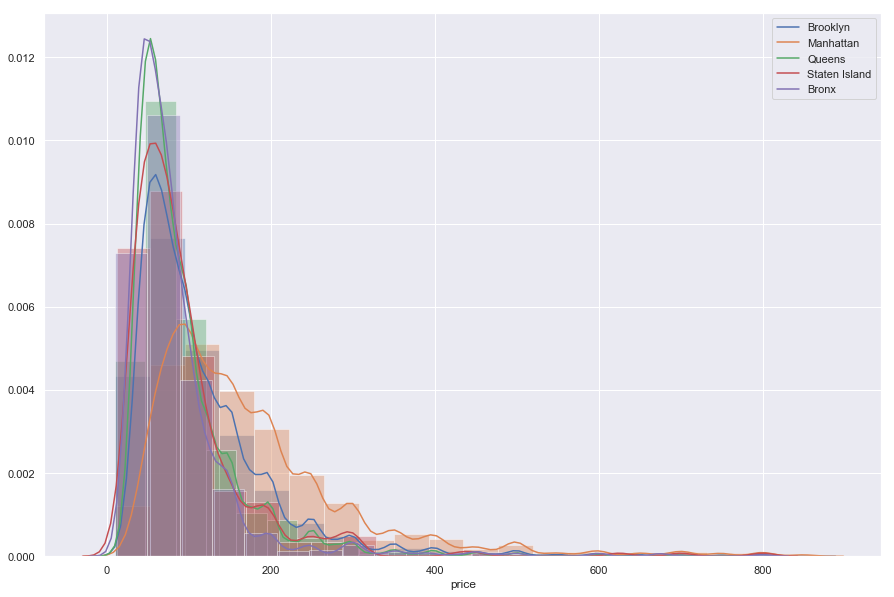

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data1.neighbourhood_group.unique():
    sns.distplot(data1.price[data1['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

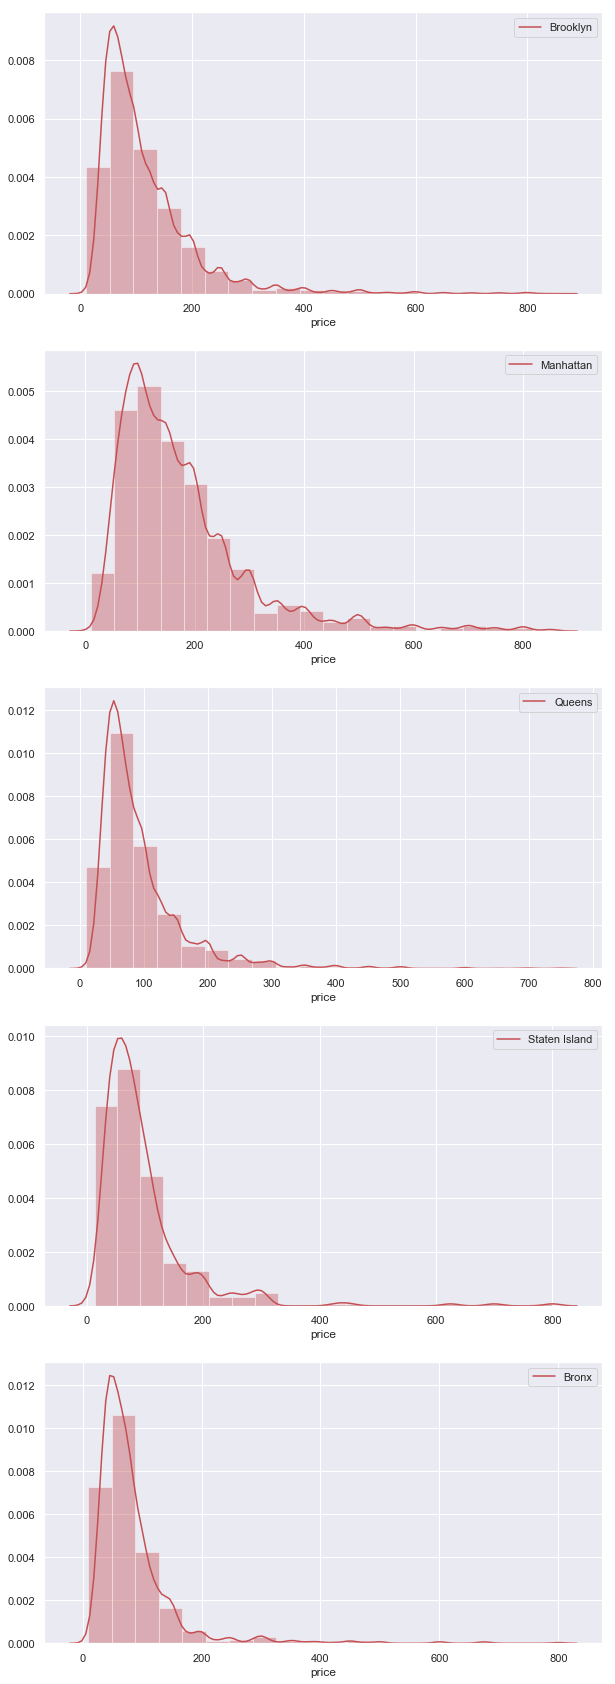

In [16]:
f = plt.figure(figsize=(10,30))
for i, groups in enumerate(data1.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sns.distplot(data1.price[data1['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=20)

### Transfer price to $\ln^{price}$ to make the dist , Normal
we want to adjust a function to make price data , normal dist.

In [14]:
data1['price_log_e'] = np.log(data1['price'])
data1.head(5)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   price_log_e  
0     5.003946  
1     5.416100  
2     5.010635  
3     4.488636  
4     4.382027

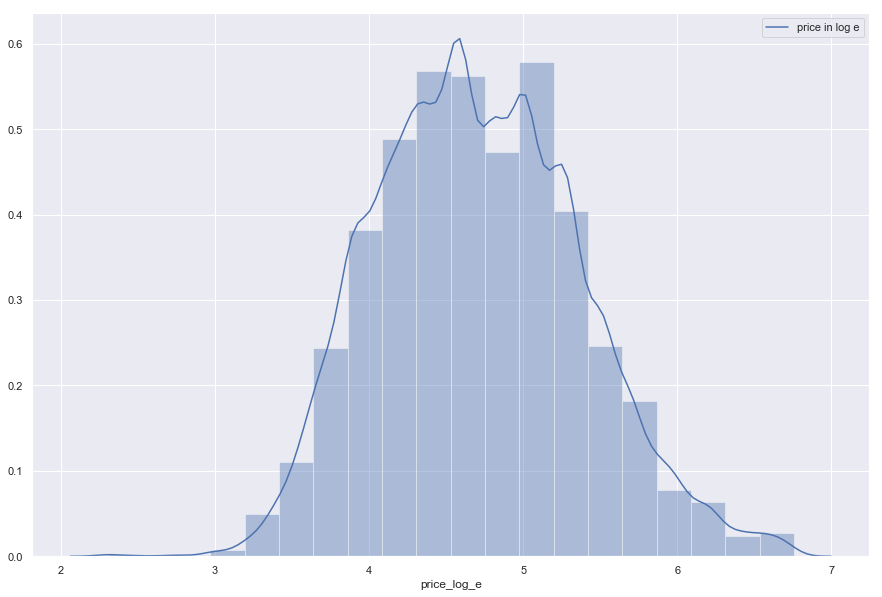

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price_log_e'],kde_kws={"label": 'price in log e'}, bins=20)

In [19]:
stats.normaltest(data1["price_log_e"])

NormaltestResult(statistic=562.3974954306634, pvalue=7.532437713364285e-123)

### Transfer price to $\log_{10}^{price}$ to make the dist , Normal
we want to adjust a function to make price data , normal dist.

In [14]:
data1['price_log_10'] = np.log10(data1['price'])
data1.head(5)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   price_log_10  
0      2.173186  
1      2.352183  
2      2.176091  
3      1.949390  
4      1.903090

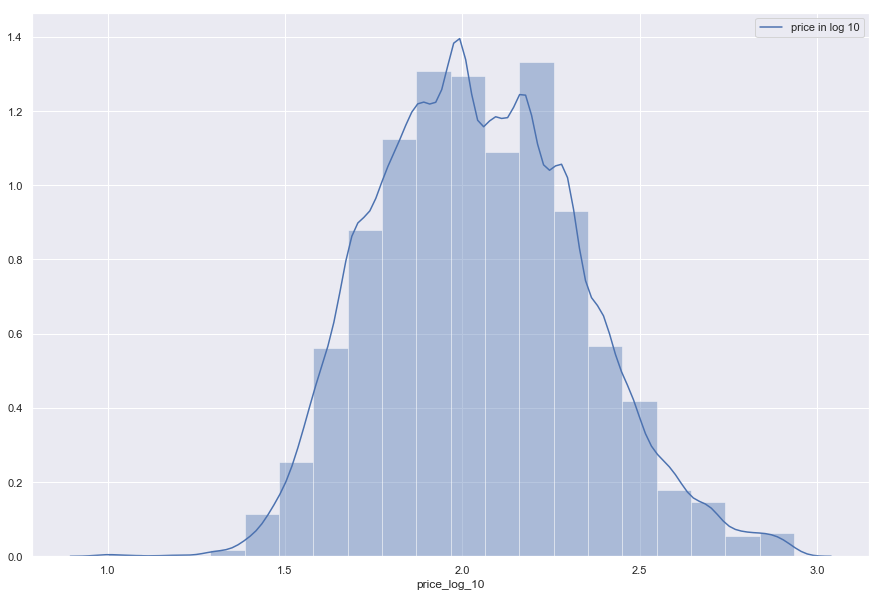

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price_log_10'],kde_kws={"label": 'price in log 10'}, bins=20)

In [22]:
stats.normaltest(data1["price_log_10"])

NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)

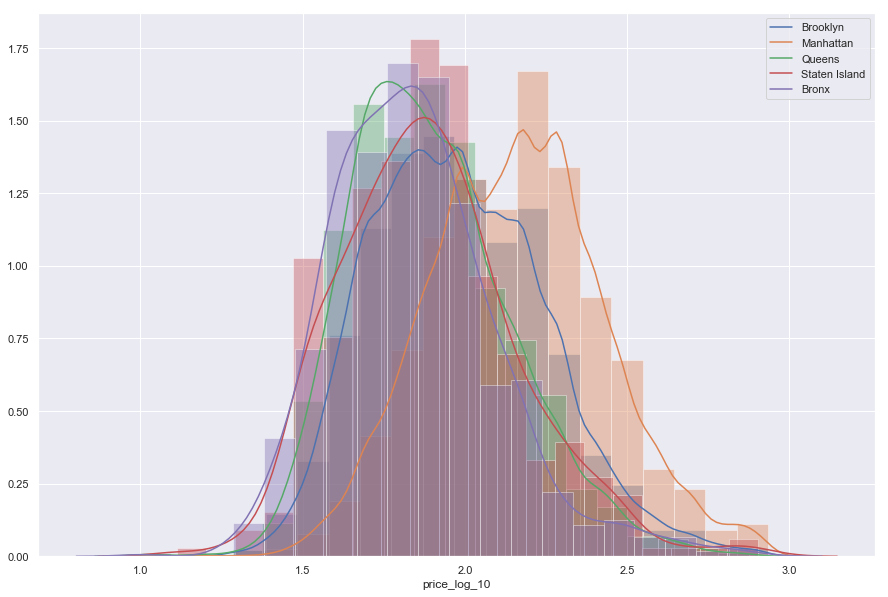

In [23]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data1.neighbourhood_group.unique():
    sns.distplot(data1.price_log_10[data1['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

Test for Normal Distribution for  Brooklyn
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------
Test for Normal Distribution for  Manhattan
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------
Test for Normal Distribution for  Queens
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------
Test for Normal Distribution for  Staten Island
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------
Test for Normal Distribution for  Bronx
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------

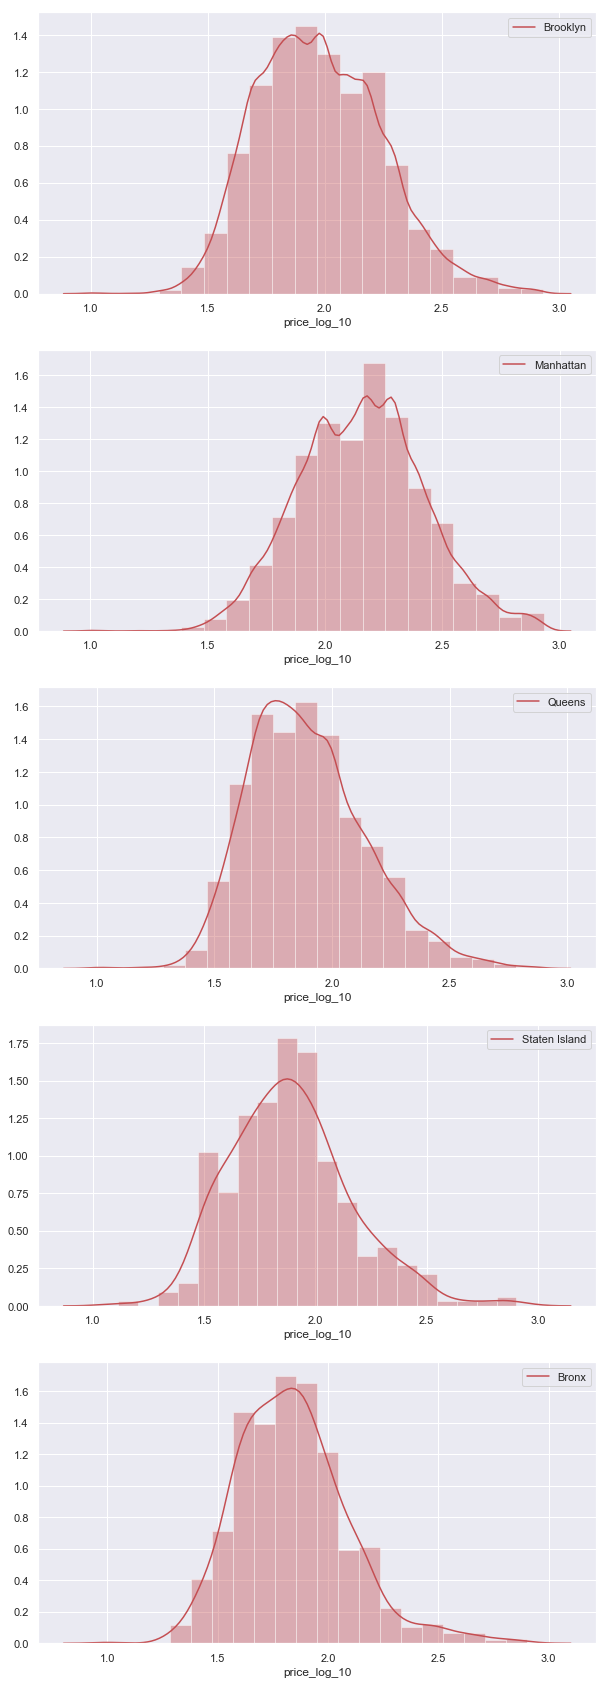

In [24]:
f = plt.figure(figsize=(10,30))
for i, groups in enumerate(data1.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sns.distplot(data1.price_log_10[data1['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=20)
    print('Test for Normal Distribution for ' , groups)
    print('------------------------------------------')
    print(stats.normaltest(data1["price_log_10"]))
    print('------------------------------------------')

### realation between neighbourhood_group & price_log_10

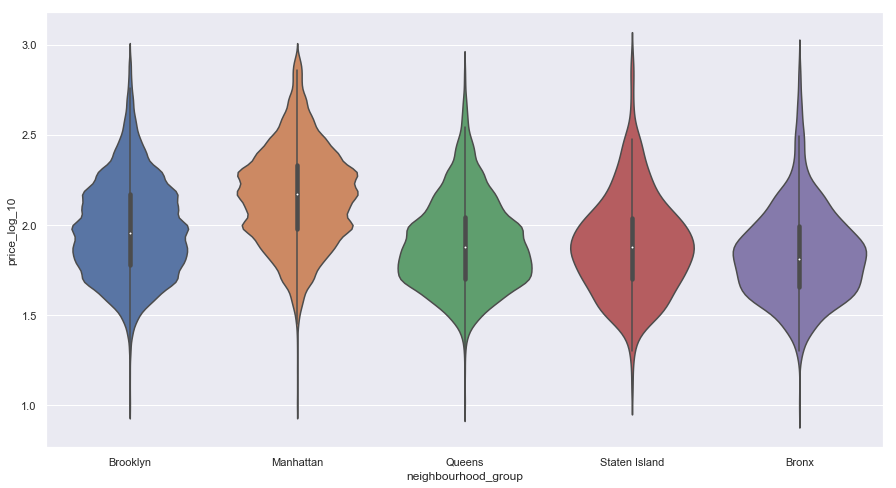

In [25]:
plt.figure(figsize=(15,8))
sns.violinplot("neighbourhood_group", "price_log_10", data=data1)

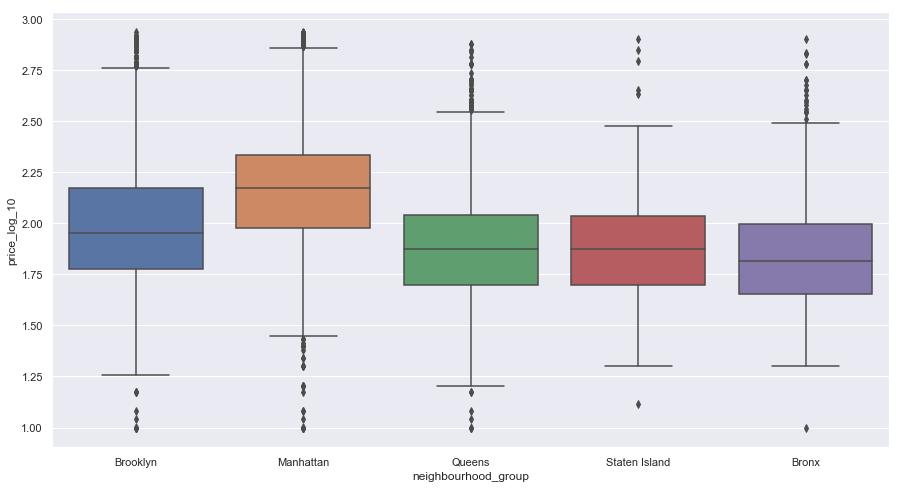

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot("neighbourhood_group", "price_log_10", data=data1)

### Anova test

In [27]:
fstat, pval = stats.f_oneway(*[data1.price_log_10[data1.neighbourhood_group == s]
for s in data1.neighbourhood_group.unique()])
print("Oneway Anova log10(price) ~ neighbourhood_group F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ neighbourhood_group F=1926.63, p-value=0.000000E+00


In [31]:
data1[["neighbourhood_group",'price']].groupby("neighbourhood_group").describe()

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1088.0   84.521140   72.677670  10.0  45.0   65.0   
Brooklyn             20011.0  116.576783   88.430146  10.0  60.0   90.0   
Manhattan            21377.0  174.867942  121.627249  10.0  95.0  149.0   
Queens                5650.0   94.104779   69.190842  10.0  50.0   75.0   
Staten Island          370.0   96.148649   84.022175  13.0  50.0   75.0   

                                   
                       75%    max  
neighbourhood_group                
Bronx                 99.0  800.0  
Brooklyn             149.0  860.0  
Manhattan            215.0  860.0  
Queens               110.0  750.0  
Staten Island        109.0  800.0

### realation between room_type & price_log_10

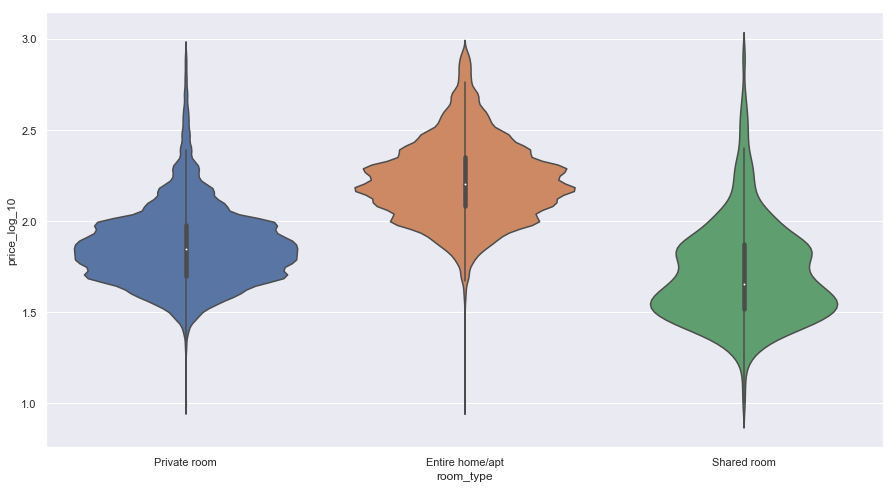

In [92]:
plt.figure(figsize=(15,8))
sns.violinplot("room_type", "price_log_10", data=data1)

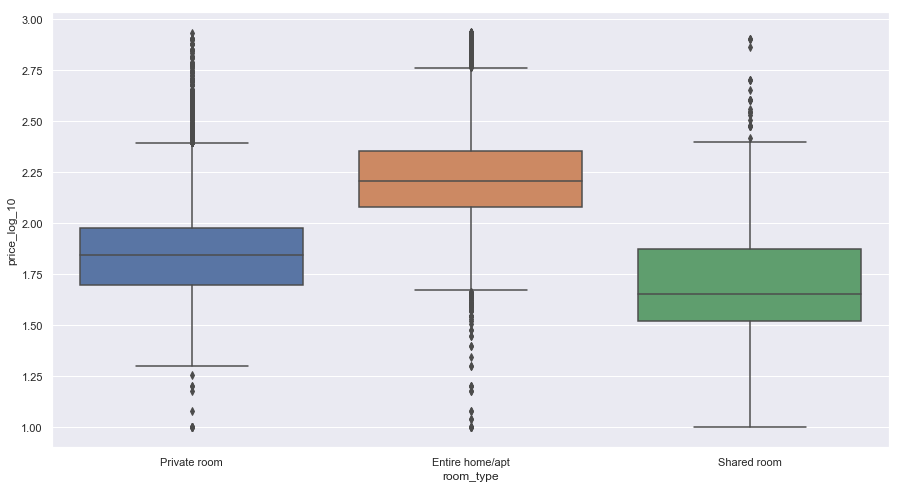

In [95]:
plt.figure(figsize=(15,8))
sns.boxplot("room_type", "price_log_10", data=data1)

In [15]:
fstat, pval = stats.f_oneway(*[data1.price_log_10[data1.room_type == s]
for s in data1.room_type.unique()])
print("Oneway Anova log10(price) ~ room_type F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ room_type F=17381.79, p-value=0.000000E+00


In [15]:
room = data1.groupby('room_type')['id'].agg(['count'])
room.head()

count
room_type             
Entire home/apt  25100
Private room     22242
Shared room       1154

In [17]:
room.reset_index(level=0, inplace=True)
room.head()

index        room_type  count
0      0  Entire home/apt  25100
1      1     Private room  22242
2      2      Shared room   1154

In [23]:
room = room[['room_type','count']]

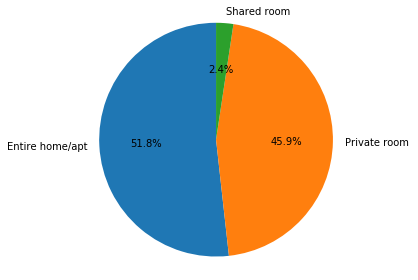

In [27]:
plt.pie(
    room['count'],
    labels=room['room_type'],
    shadow=False,
    startangle=90,
    autopct='%1.1f%%',
    )

plt.axis('equal')

plt.tight_layout()
plt.show()

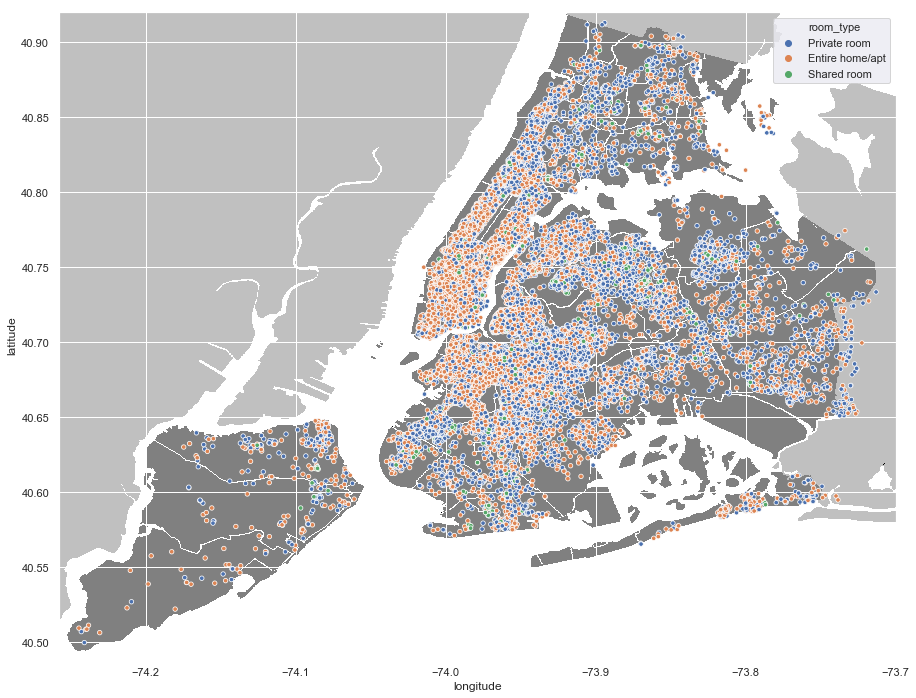

In [94]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data1['longitude'], y=data1['latitude'], hue='room_type',s=20, data=data1)
plt.legend()
plt.show()

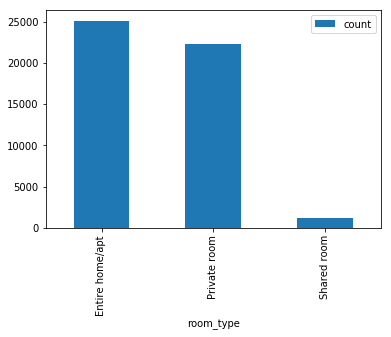

In [19]:
data1.groupby('room_type')['id'].agg(['count']).plot(kind="bar")

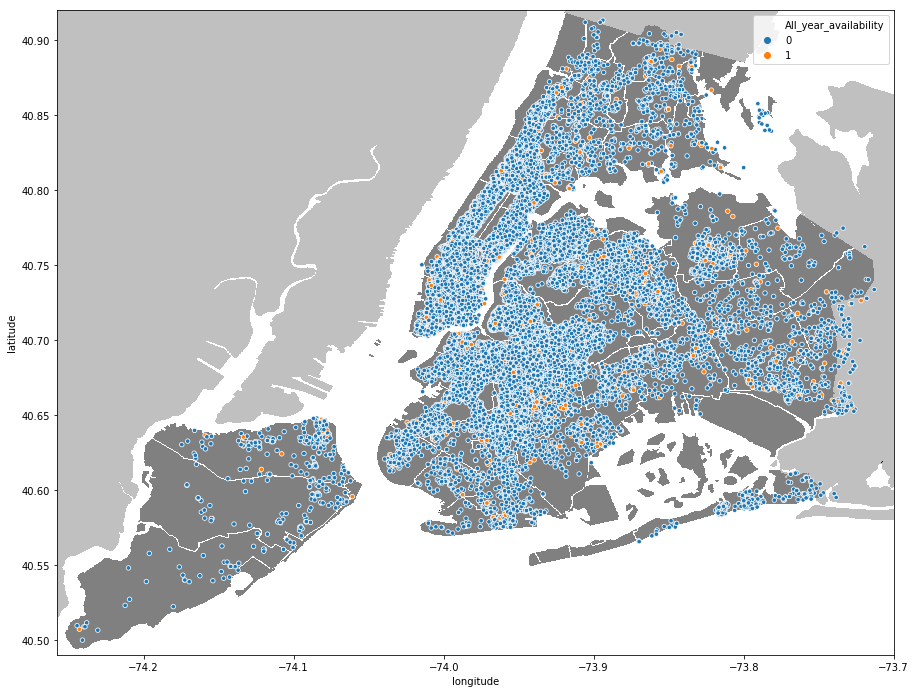

In [21]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data1['longitude'], y=data1['latitude'], hue='All_year_availability',s=20, data=data1)
plt.legend()
plt.show()

### realation between All_year_availability & price_log_10

Define new variable {All_year_availability}

All_year_availability = $\begin{cases} 1 ~ if ~ availability365 = 365 \\
0 ~ otherwise
\end{cases}$

this var say that could a person books in all days of year or not

In [17]:
data1['All_year_availability']= 0
data1.head(5)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   price_log_10  All_year_availability  
0      2.173186                      0  
1      2.352183                      0  
2      2.176091                      0  
3      1.949390                      0  
4      1.903090                      0

In [18]:
for i in range(len(data1)):
    if int(data1.iloc[i, data1.columns.get_loc('availability_365')]) == 365:
        data1.iloc[i, data1.columns.get_loc('All_year_availability')] = 1

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


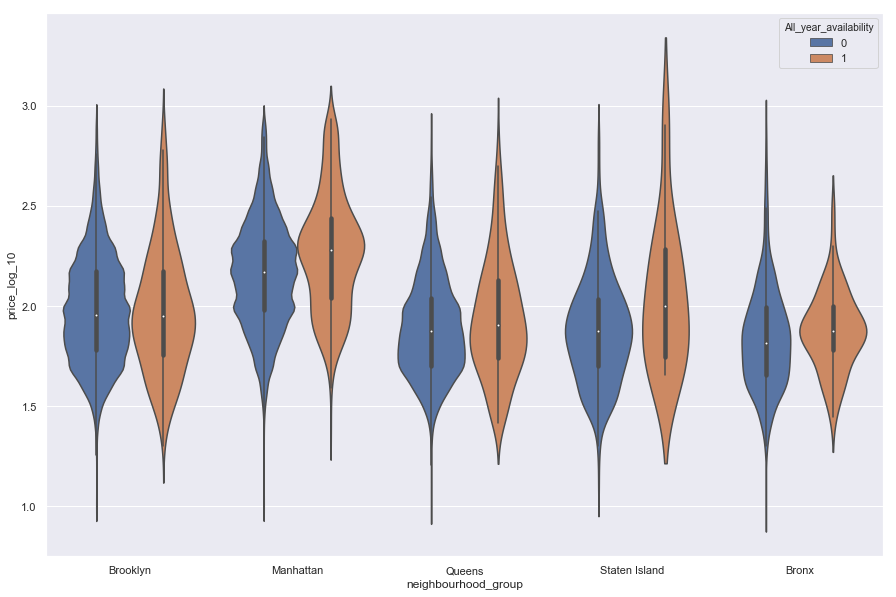

In [34]:
sns.violinplot("neighbourhood_group", "price_log_10", hue="All_year_availability",data=data1)

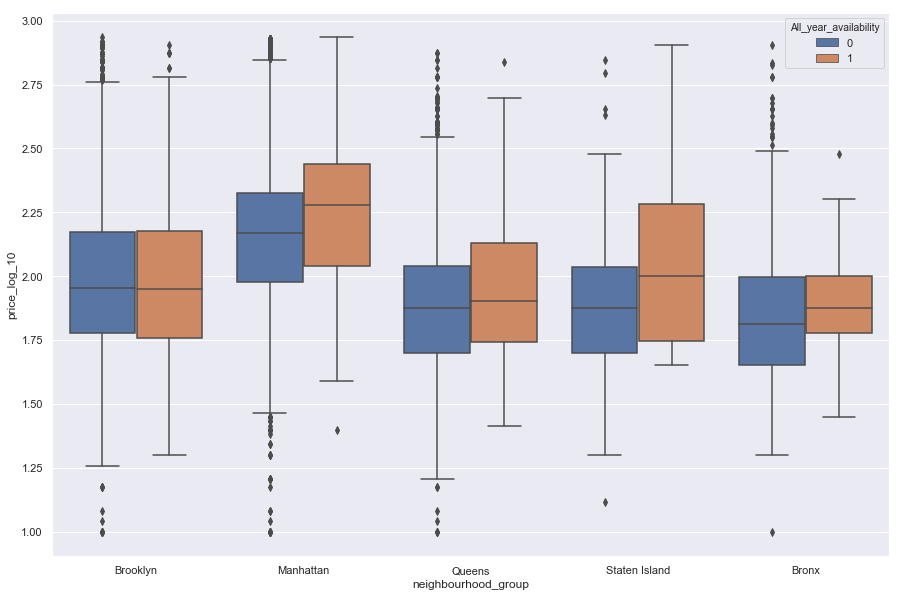

In [35]:
sns.boxplot("neighbourhood_group", "price_log_10", hue="All_year_availability",data=data1)

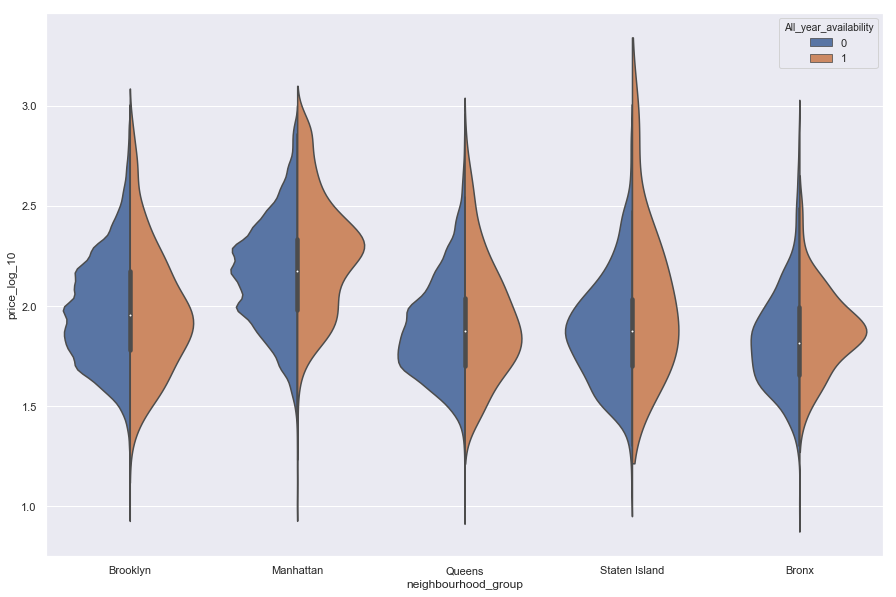

In [36]:
sns.violinplot("neighbourhood_group", "price_log_10", hue="All_year_availability",data=data1 , split=True)

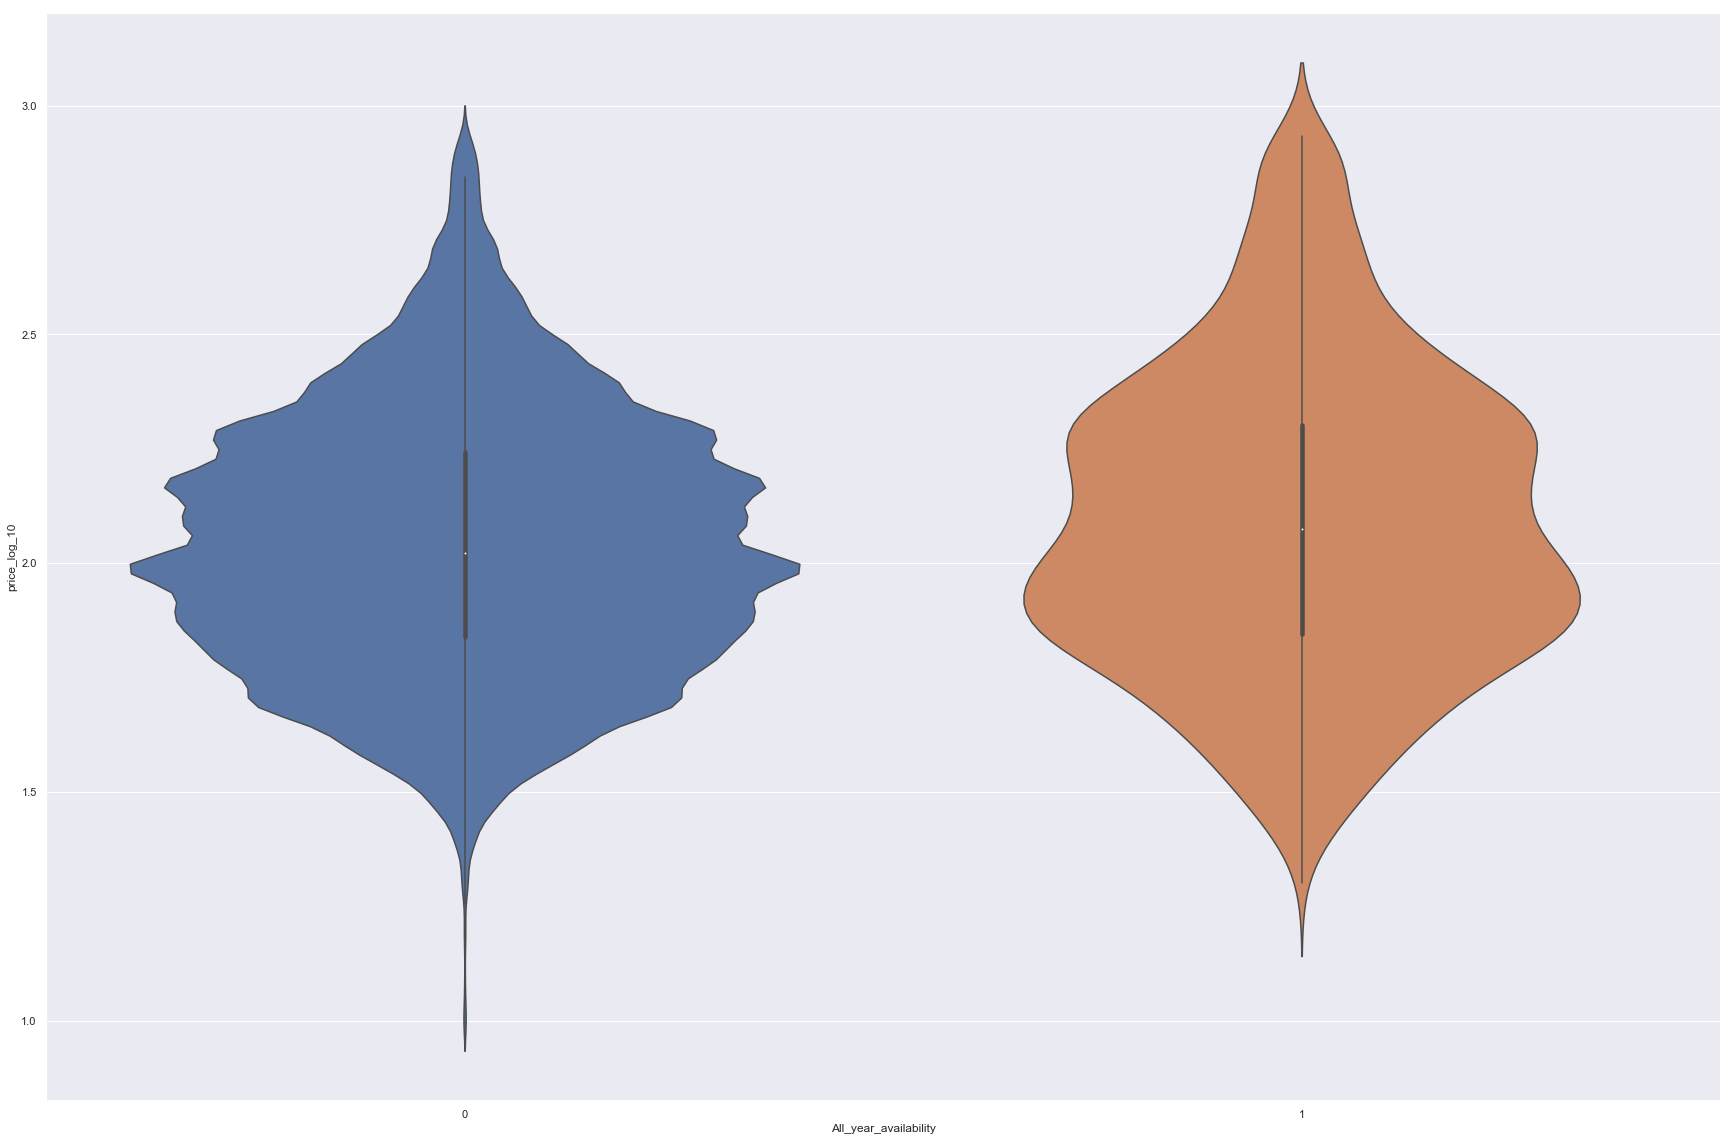

In [96]:
sns.violinplot("All_year_availability", "price_log_10",data=data1)

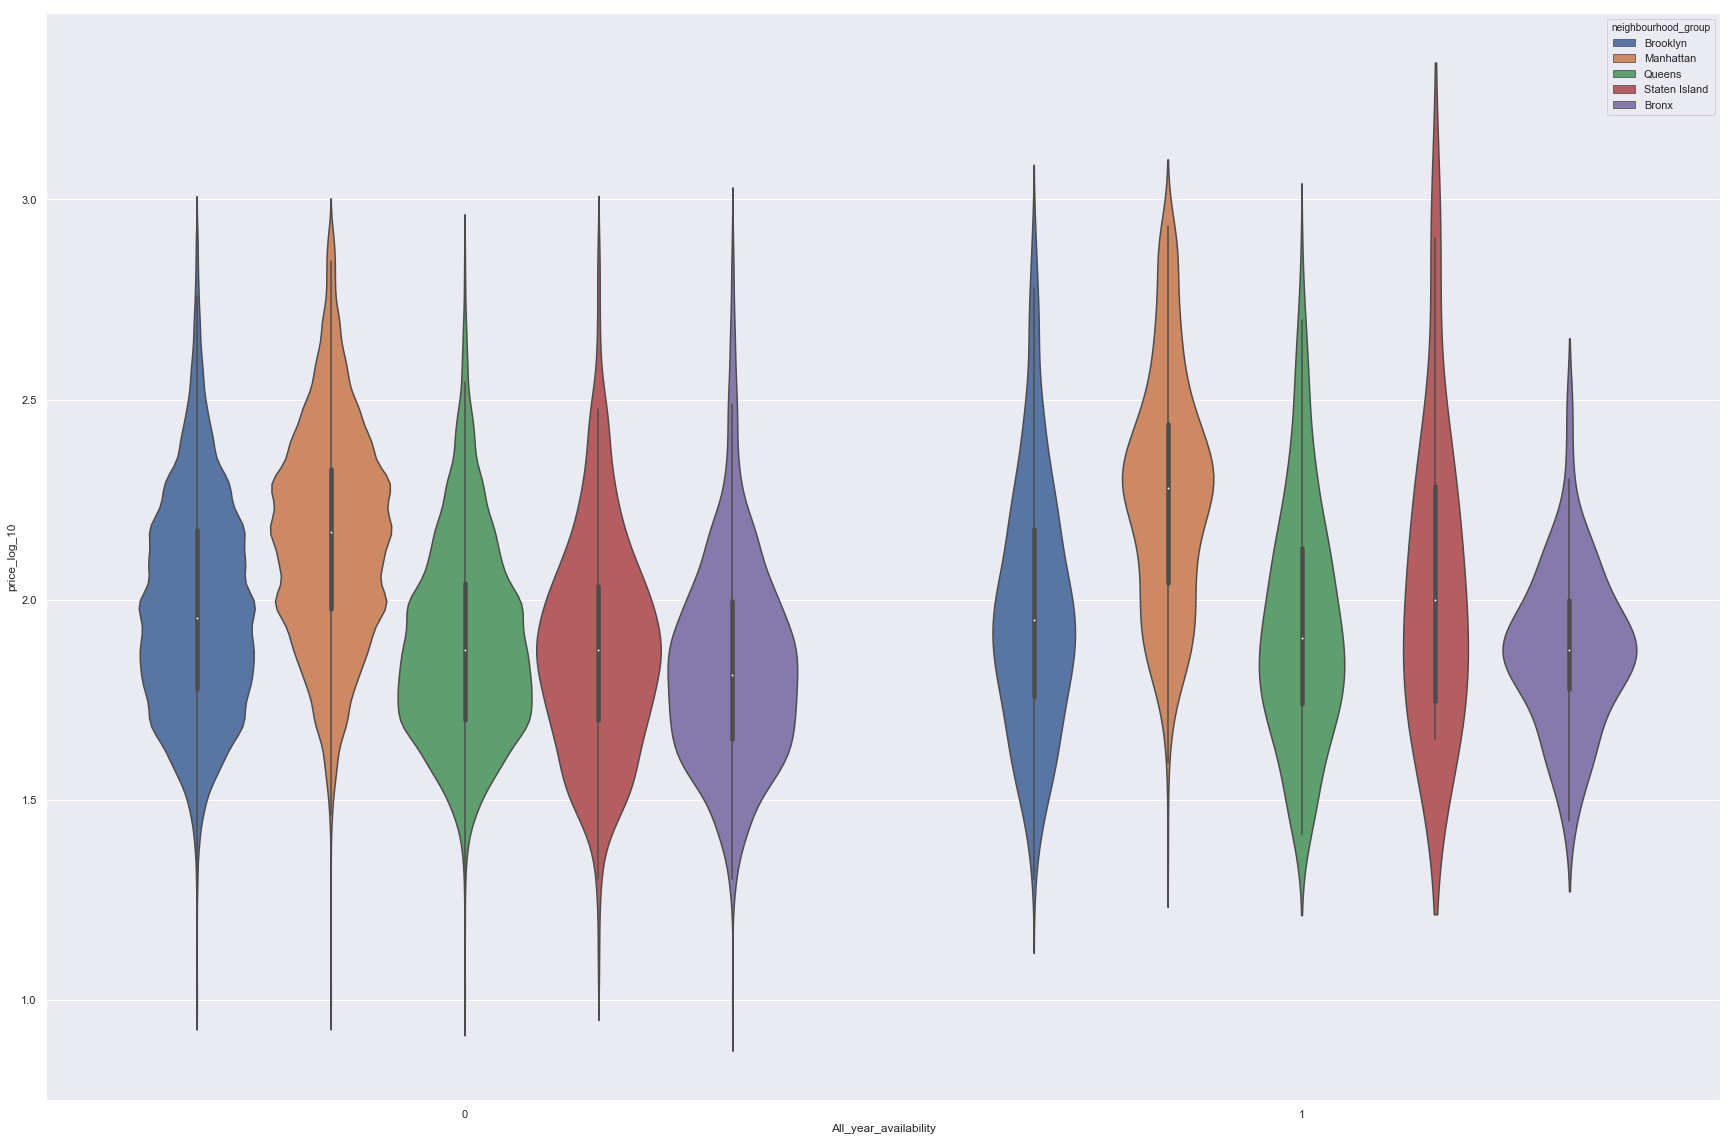

In [98]:
sns.violinplot("All_year_availability", "price_log_10", hue="neighbourhood_group",data=data1)

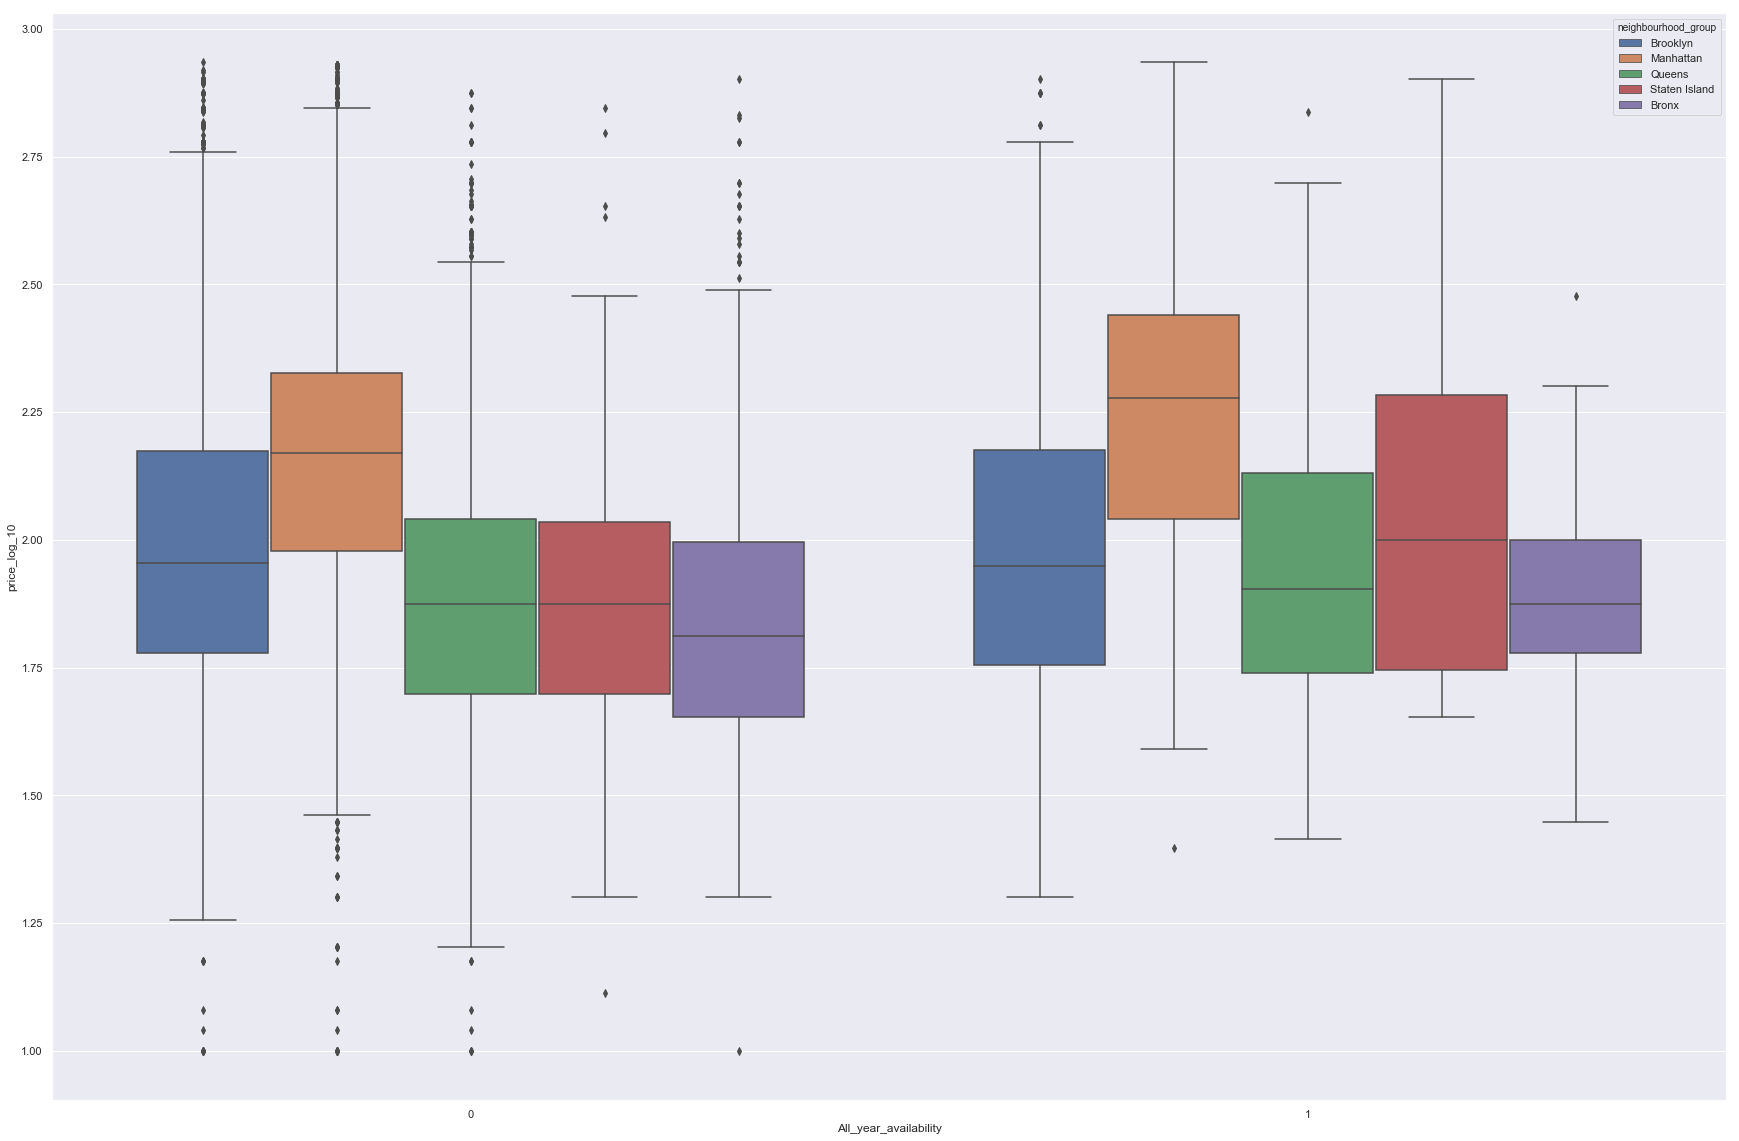

In [99]:
sns.boxplot("All_year_availability", "price_log_10", hue="neighbourhood_group",data=data1)

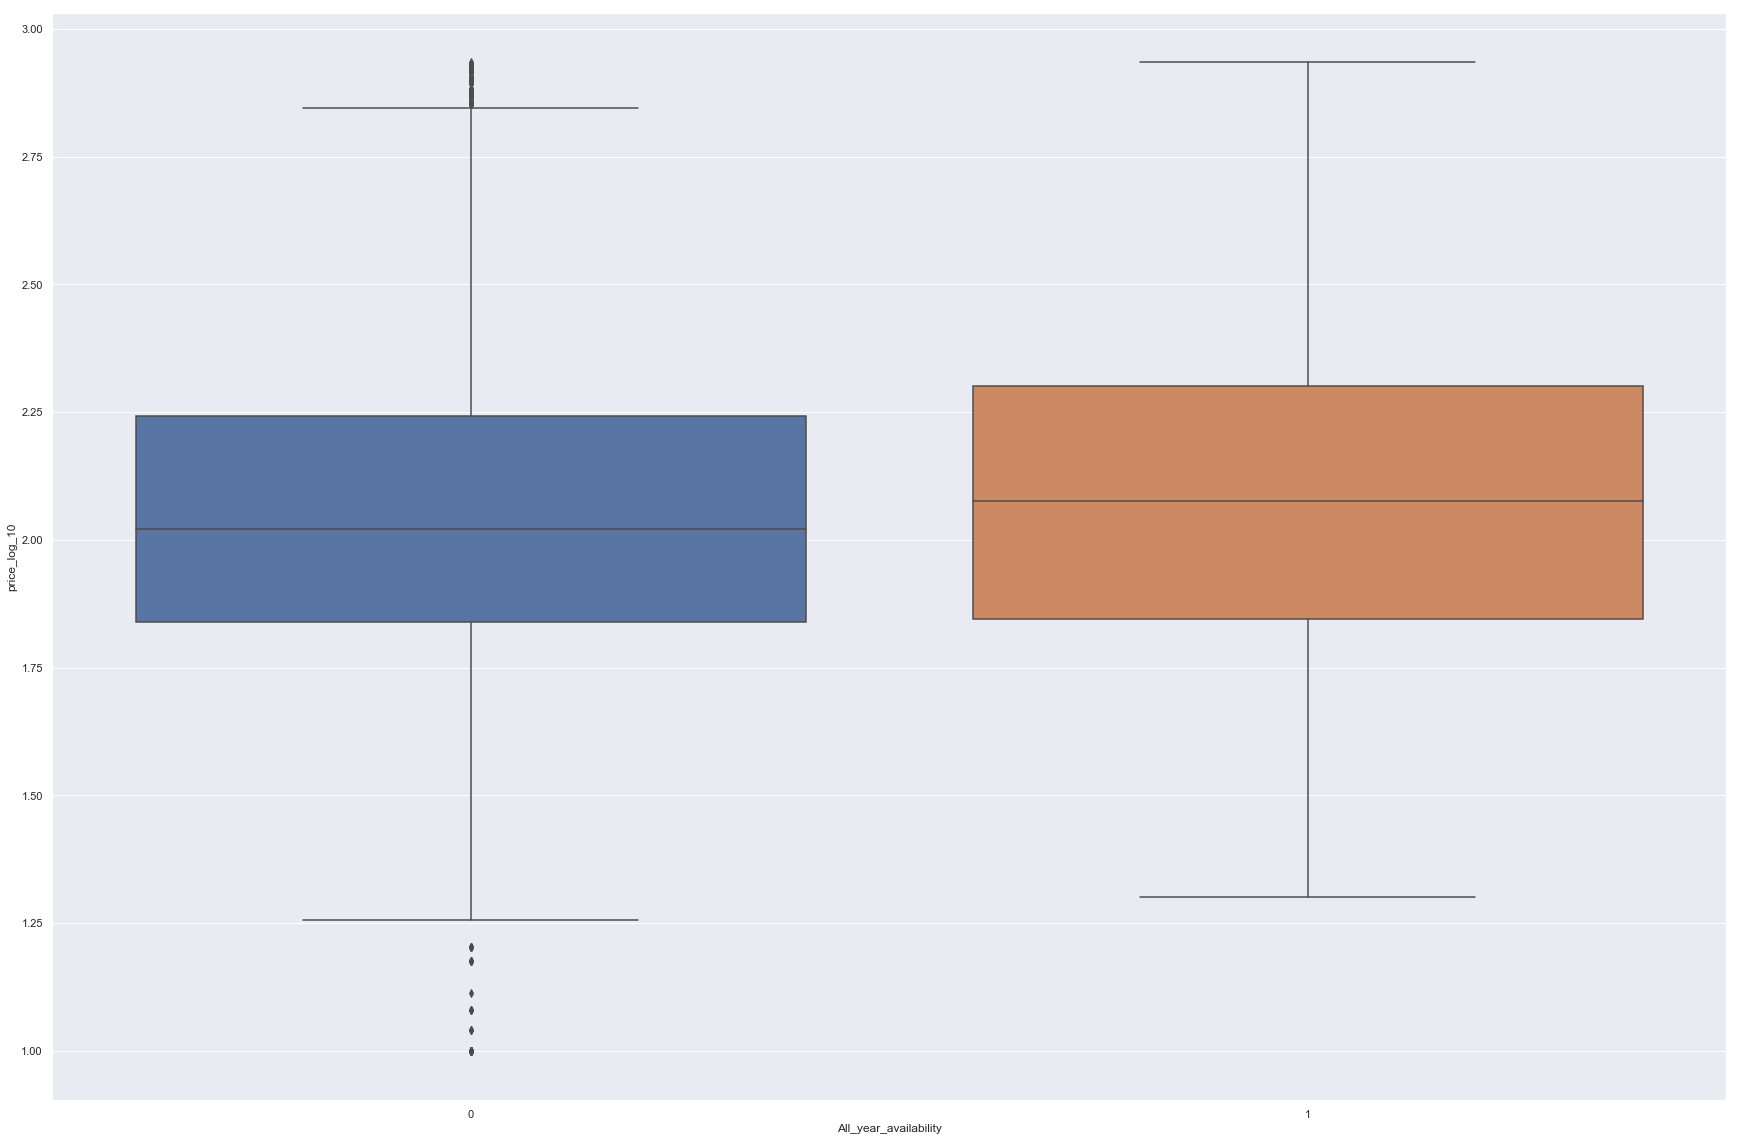

In [97]:
sns.boxplot("All_year_availability", "price_log_10",data=data1)

### T-Test

In [101]:
stats.ttest_rel(data1['All_year_availability'],data1["price_log_10"])

Ttest_relResult(statistic=-1377.1102987201546, pvalue=0.0)

### realation between minimum_nights & price_log_10

In [37]:
data1['minimum_nights'].describe()

count    48496.000000
mean         6.979256
std         20.292989
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

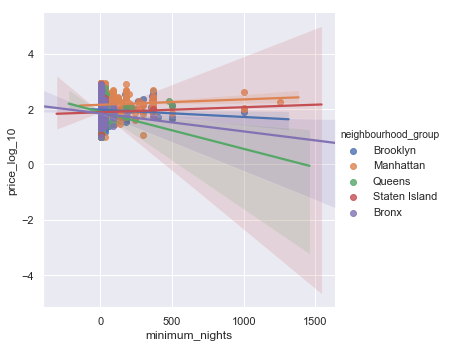

In [38]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("minimum_nights","price_log_10", hue="neighbourhood_group", data=data1)

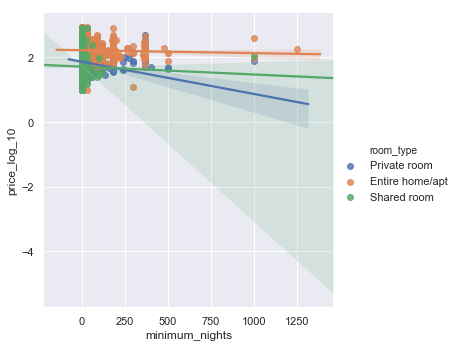

In [89]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("minimum_nights","price_log_10", hue="room_type", data=data1)

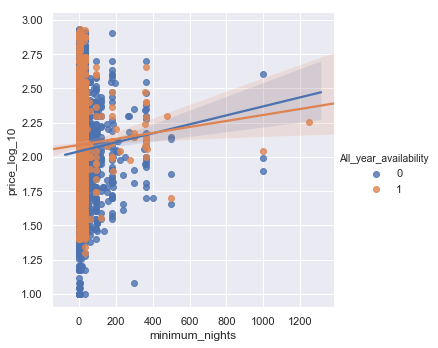

In [39]:
sns.lmplot("minimum_nights", "price_log_10", hue="All_year_availability",data=data1)

In [40]:
data1.isnull().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9859
reviews_per_month                 9859
calculated_host_listings_count       0
availability_365                     0
price_log_e                          0
price_log_10                         0
All_year_availability                0
dtype: int64

### Clean reviews_per_month
fill null data with zero

In [41]:
data1[data1['reviews_per_month'].isnull()]

id                                               name    host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
19         7750                  Huge 2 BR Upper East  Cental Park      17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres      26394   
36        11452                        Clean and Quiet in Brooklyn       7355   
38        11943                          Country space in the city      45445   
193       51438                1 Bedroom in 2 Bdrm Apt- Upper East     236421   
204       54466                Beautiful Uptown Manhattan apartmnt     253385   
260       63588                                                LL3     295128   
265       63913             HOSTING YOUR  SUNNY, SPACIOUS NYC ROOM     312288   
267       64015                       Prime East Village 1 Bedroom     146944   
276       65556                 Room in S3rd/Bedford, Williamsburg     320422   
345       89427                               The Brooklyn Waverly     116599   
349       94209                 LARGE 1BR (CONV 2BR) CROWN HEIGHTS     503800   
390      118680              Spacious East Village apt near it all     599354   
425      145188                      Parisian apartment in Chelsea     703156   
432      149287                 Your own apartment off Park Avenue     720320   
437      152071                               Park Slope Apartment     731855   
486      169483   Very close to Downtown Awesome Private Apartment     807642   
545      200645                     Best Manhattan Studio Deal!        933378   
585      221043                        1 Bedroom in prime Flatiron     846050   
627      236806                 charming 2bdrm apt in East Village    1151987   
629      237210      Manhattan Loft in Prime East Village Location    1243192   
633      239826                Amazing 1 bed, live like a Newyorkr    1257760   
658      250311         1 Bedroom Available In My Two Bedroom Flat     945499   
661      250537                                The Lenox in Harlem    1313306   
703      258876                Affordable rooms,all transportation    1360198   
728      265912           Spacious  2 bed Loft apartment Bedford L    1394719   
732      266437                  West Village cozy 2 bedroom  NYC     1397061   
763      273256                 Beautiful bed and bath - Manhattan    1429642   
791      283072                       One bedroom sharing Bathroom    1474637   
...         ...                                                ...        ...   
48865  36472171                      1 bedroom in sunlit apartment   99144947   
48866  36472710                                 CozyHideAway Suite  274225617   
48867  36473044    The place you were dreaming for.(only for guys)  261338177   
48868  36473253                       Heaven for you(only for guy)  261338177   
48869  36474023                        Cozy, Sunny Brooklyn Escape    1550580   
48870  36474911      Cozy, clean Williamsburg 1- bedroom apartment    1273444   
48871  36475746      A LARGE ROOM - 1 MONTH MINIMUM - WASHER&DRYER  144008701   
48872  36476675                                      Nycity-MyHome    8636072   
48873  36477307                                  Brooklyn paradise  241945355   
48874  36477588                   Short Term Rental in East Harlem  214535893   
48875  36478343                              Welcome all as family  274273284   
48876  36478357    Cozy, Air-Conditioned Private Bedroom in Harlem  177932088   
48877  36479230             Studio sized room with beautiful light   65767720   
48878  36479723                                      Room for rest   41326856   
48879  36480292  Gorgeous 1.5 Bdr with a private yard- Williams...     540335   
48880  36481315  The Raccoon Artist Studio in Williamsburg New ...  208514239   
48881  36481615                   Peaceful space in Greenpoint, BK  274298453   
48882  36482231                          Bus

In [18]:
data1[['reviews_per_month','neighbourhood_group']] = data1[['reviews_per_month','neighbourhood_group']].fillna(value=0)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [19]:
data1.reviews_per_month.describe()

count    48496.000000
mean         1.095951
std          1.600386
min          0.000000
25%          0.040000
50%          0.380000
75%          1.600000
max         58.500000
Name: reviews_per_month, dtype: float64

In [20]:
data1.isnull().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9859
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
price_log_e                          0
price_log_10                         0
All_year_availability                0
dtype: int64

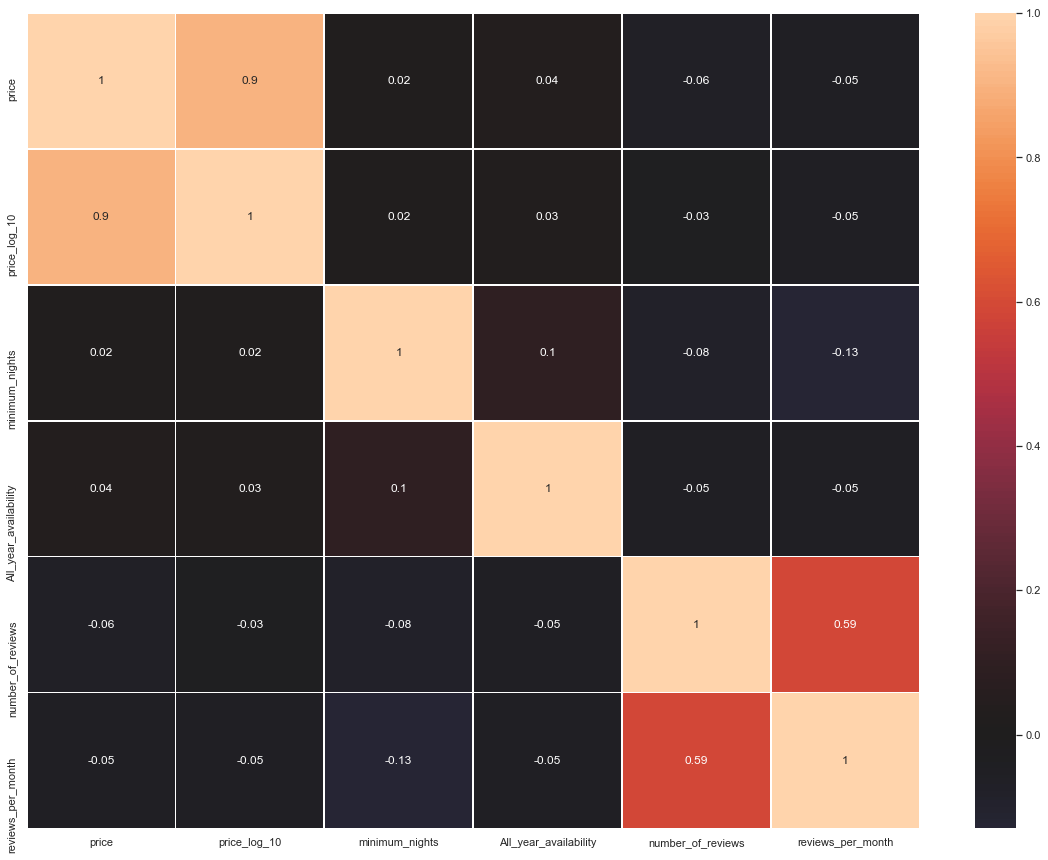

In [45]:
plt.figure(i,figsize=(20,15))
correlation_matrix = data1[["price",'price_log_10',"minimum_nights","All_year_availability","number_of_reviews","reviews_per_month"]].corr().round(2)
sns.heatmap(data=correlation_matrix ,center=0 , linewidths=.7, annot=True)

In [21]:
temp = data1[data1['reviews_per_month']>0]
temp.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
3               4.64                               1               194   
4               0.10                               1                 0   
5               0.59                               1               129   

   price_log_e  price_log_10  All_year_availability  
0     5.003946      2.173186                      1  
1     5.416100      2.352183                      0  
3     4.488636      1.949390                      0  
4     4.382027      1.903090                      0  
5     5.298317      2.301030                      0

In [47]:
temp.describe()

id       host_id      latitude     longitude         price  \
count  3.863700e+04  3.863700e+04  38637.000000  38637.000000  38637.000000   
mean   1.809885e+07  6.423962e+07     40.728097    -73.951028    133.982737   
std    1.069305e+07  7.588907e+07      0.055058      0.046730    101.159171   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420     10.000000   
25%    8.720923e+06  7.050126e+06     40.688600    -73.982370     68.000000   
50%    1.887209e+07  2.837867e+07     40.721600    -73.954710    100.000000   
75%    2.755942e+07  1.018839e+08     40.763000    -73.934930    169.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990    860.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38637.000000       38637.000000       38637.000000   
mean         5.847840          29.364392           1.375605   
std         17.301728          48.271404           1.682290   
min          1.000000           1.000000           0.010000   
25%          1.000000           3.000000           0.190000   
50%          2.000000           9.000000           0.720000   
75%          4.000000          33.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365   price_log_e  \
count                    38637.000000      38637.000000  38637.000000   
mean                         5.176411        114.355566      4.684235   
std                         26.362879        129.282480      0.638155   
min                          1.000000          0.000000      2.302585   
25%                          1.000000          0.000000      4.219508   
50%                          1.000000         54.000000      4.605170   
75%                          2.000000        227.000000      5.129899   
max                        327.000000        365.000000      6.756932   

       price_log_10  All_year_availability  
count  38637.000000           38637.000000  
mean       2.034337               0.020990  
std        0.277147               0.143353  
min        1.000000               0.000000  
25%        1.832509               0.000000  
50%        2.000000               0.000000  
75%        2.227887               0.000000  
max        2.934498               1.000000

### realation between reviews_per_month & neighbourhood_group

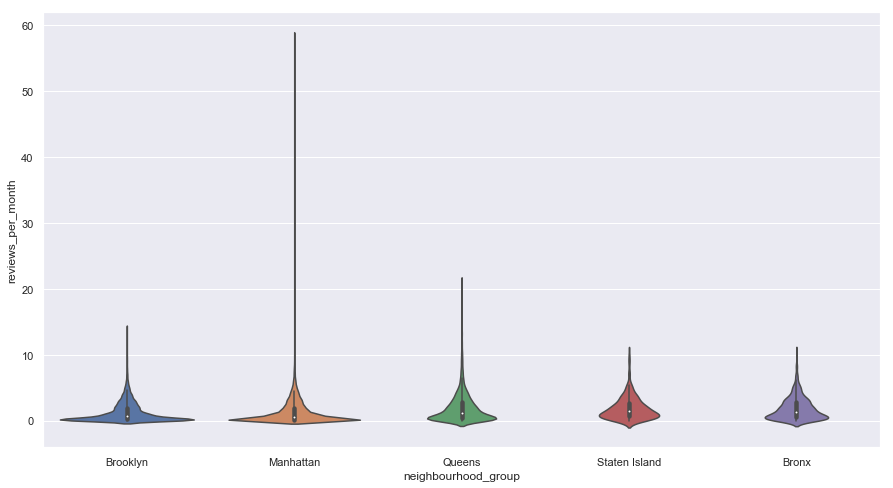

In [48]:
plt.figure(figsize=(15,8))
sns.violinplot("neighbourhood_group", "reviews_per_month", data=temp)

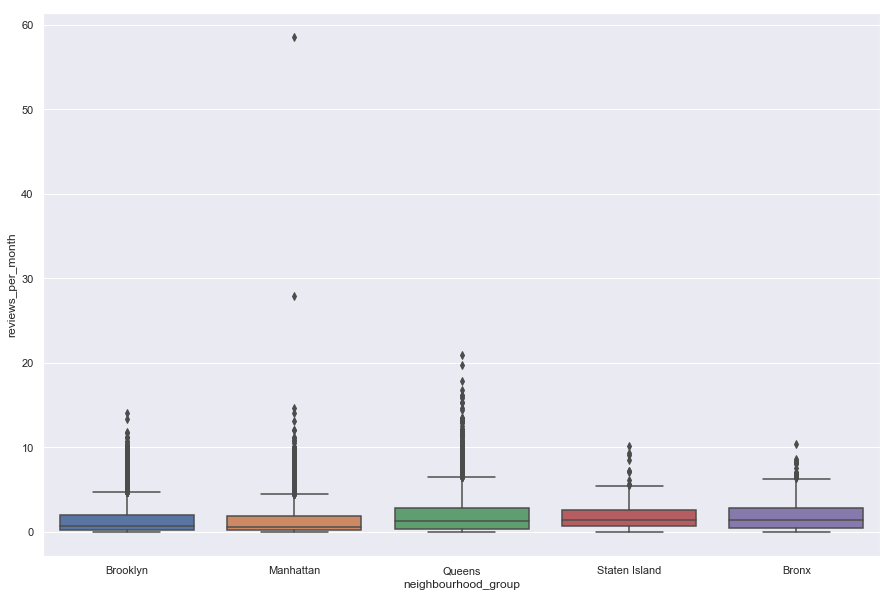

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot("neighbourhood_group", "reviews_per_month", data=temp)

In [50]:
fstat, pval = stats.f_oneway(*[temp.reviews_per_month[temp.neighbourhood_group == s]
for s in temp.neighbourhood_group.unique()])
print("Oneway Anova reviews_per_month ~ neighbourhood_group F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova reviews_per_month ~ neighbourhood_group F=182.84, p-value=1.674033E-155


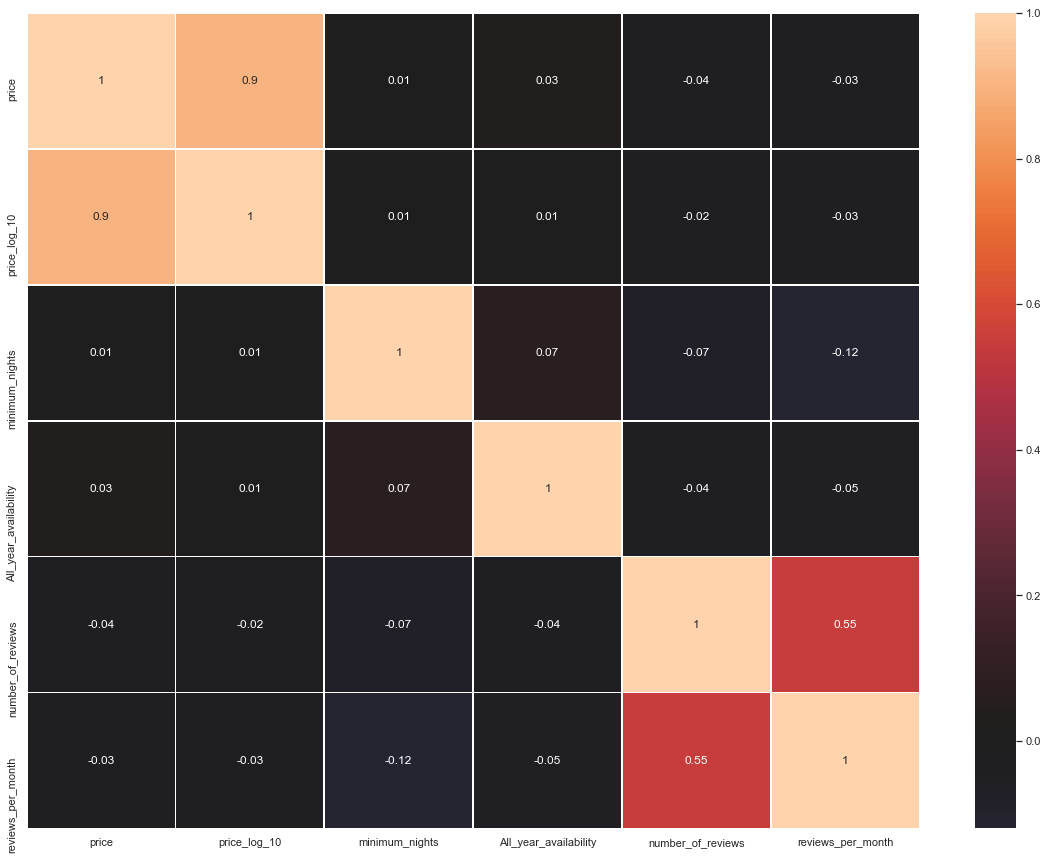

In [51]:
plt.figure(i,figsize=(20,15))
correlation_matrix = temp[["price",'price_log_10',"minimum_nights","All_year_availability","number_of_reviews","reviews_per_month"]].corr().round(2)
sns.heatmap(data=correlation_matrix ,center=0 , linewidths=.7, annot=True)

### realation between reviews_per_month & price_log_10

In [52]:
stats.stats.spearmanr(data1['reviews_per_month'],data1['price_log_10'])

SpearmanrResult(correlation=-0.05234894275081656, pvalue=8.707821489409389e-31)

In [53]:
data1.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   price_log_e  price_log_10  All_year_availability  
0     5.003946      2.173186                      1  
1     5.416100      2.352183                      0  
2     5.010635      2.176091                      1  
3     4.488636      1.949390                      0  
4     4.382027      1.903090                      0

In [31]:
data1.reset_index()

index        id                                               name  \
0          0      2539                 Clean & quiet apt home by the park   
1          1      2595                              Skylit Midtown Castle   
2          2      3647                THE VILLAGE OF HARLEM....NEW YORK !   
3          3      3831                    Cozy Entire Floor of Brownstone   
4          4      5022   Entire Apt: Spacious Studio/Loft by central park   
5          5      5099          Large Cozy 1 BR Apartment In Midtown East   
6          6      5121                                    BlissArtsSpace!   
7          7      5178                   Large Furnished Room Near B'way    
8          8      5203                 Cozy Clean Guest Room - Family Apt   
9          9      5238                 Cute & Cozy Lower East Side 1 bdrm   
10        10      5295                   Beautiful 1br on Upper West Side   
11        11      5441                    Central Manhattan/near Broadway   
12        12      5803     Lovely Room 1, Garden, Best Area, Legal rental   
13        13      6021   Wonderful Guest Bedroom in Manhattan for SINGLES   
14        14      6090                      West Village Nest - Superhost   
15        15      6848                   Only 2 stops to Manhattan studio   
16        16      7097                  Perfect for Your Parents + Garden   
17        17      7322                                    Chelsea Perfect   
18        18      7726    Hip Historic Brownstone Apartment with Backyard   
19        19      7750                  Huge 2 BR Upper East  Cental Park   
20        20      7801                   Sweet and Spacious Brooklyn Loft   
21        21      8024                     CBG CtyBGd HelpsHaiti rm#1:1-4   
22        22      8025                           CBG Helps Haiti Room#2.5   
23        23      8110                              CBG Helps Haiti Rm #2   
24        24      8490             MAISON DES SIRENES1,bohemian apartment   
25        25      8505                 Sunny Bedroom Across Prospect Park   
26        26      8700  Magnifique Suite au N de Manhattan - vue Cloitres   
27        27      9357                               Midtown Pied-a-terre   
28        28      9518       SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM   
29        29      9657                   Modern 1 BR / NYC / EAST VILLAGE   
...      ...       ...                                                ...   
48466  48865  36472171                      1 bedroom in sunlit apartment   
48467  48866  36472710                                 CozyHideAway Suite   
48468  48867  36473044    The place you were dreaming for.(only for guys)   
48469  48868  36473253                       Heaven for you(only for guy)   
48470  48869  36474023                        Cozy, Sunny Brooklyn Escape   
48471  48870  36474911      Cozy, clean Williamsburg 1- bedroom apartment   
48472  48871  36475746      A LARGE ROOM - 1 MONTH MINIMUM - WASHER&DRYER   
48473  48872  36476675                                      Nycity-MyHome   
48474  48873  36477307                                  Brooklyn paradise   
48475  48874  36477588                   Short Term Rental in East Harlem   
48476  48875  36478343                              Welcome all as family   
48477  48876  36478357    Cozy, Air-Conditioned Private Bedroom in Harlem   
48478  48877  36479230             Studio sized room with beautiful light   
48479  48878  36479723                                      Room for rest   
48480  48879  36480292  Gorgeous 1.5 Bdr with a private yard- Williams...   
48481  48880  36481315  The Raccoon Artist Studio in Williamsburg New ...   
48482  48881  36481615                   Peaceful space in Greenpoint, BK   
48483  48882  36482231                          Bushwick _ Myrtle-Wyckoff   
48484  48883  36482416       Sunny Bedroom NYC! Walking to Central Park!!   
48485  48884  36482783        Brooklyn Oasis in the heart of Williamsburg   
484

### find duplicate hosts by host_id

In [55]:
duplicate_host = data1[data1[['host_id']].duplicated()]
duplicate_host.head(5)

id                                             name  host_id  \
22   8025                         CBG Helps Haiti Room#2.5    22486   
23   8110                            CBG Helps Haiti Rm #2    22486   
33   9783                              back room/bunk beds    32294   
35  10962  Lovely room 2 & garden; Best area, Legal rental     9744   
39  12048              LowerEastSide apt share shortterm 1     7549   

          host_name neighbourhood_group    neighbourhood  latitude  longitude  \
22            Lisel            Brooklyn       Park Slope  40.67989  -73.97798   
23            Lisel            Brooklyn       Park Slope  40.68001  -73.97865   
33  Ssameer Or Trip           Manhattan           Harlem  40.82130  -73.95318   
35           Laurie            Brooklyn      South Slope  40.66869  -73.98780   
39              Ben           Manhattan  Lower East Side  40.71401  -73.98917   

       room_type  price  minimum_nights  number_of_reviews last_review  \
22  Private room     80               1                 39  2019-01-01   
23  Private room    110               2                 71  2019-07-02   
33  Private room     50               3                273  2019-07-01   
35  Private room     89               4                168  2019-06-21   
39   Shared room     40               1                214  2019-07-05   

    reviews_per_month  calculated_host_listings_count  availability_365  \
22               0.37                               6               364   
23               0.61                               6               304   
33               2.37                               3               359   
35               1.41                               3               340   
39               1.81                               4               188   

    price_log_e  price_log_10  All_year_availability  
22     4.382027      1.903090                      0  
23     4.700480      2.041393                      0  
33     3.912023      1.698970                      0  
35     4.488636      1.949390                      0  
39     3.688879      1.602060                      0

In [56]:
duplicate = duplicate_host.groupby('host_id')['id'].agg(['count']).sort_values(by=['count'],ascending=False)
duplicate.head(25)

count
host_id         
219517861    326
107434423    231
30283594     117
137358866    102
12243051      95
16098958      95
61391963      90
22541573      86
200380610     64
7503643       51
1475015       51
120762452     49
2856748       48
190921808     46
205031545     45
26377263      42
2119276       38
19303369      36
25237492      33
119669058     33
76104209      32
113805886     32
213781715     32
238321374     31
50760546      30

In [57]:
duplicate.reset_index(level=0, inplace=True)

In [58]:
frames = []
counter = 0
for ids in duplicate["host_id"]:
    
    
    group_list = []
    num_list = []
    
    temp = data1[data1['host_id'] == ids]
    price = temp.price.sum()
    avarage = price/len(temp)
    t = temp.groupby('neighbourhood_group')['id'].agg(['count'])
    t.reset_index(level=0, inplace=True)
    for i in range(len(t)):
        group_name = t["neighbourhood_group"][i]
        if group_name not in group_list:
            group_list.append(group_name)
            num_group = t['count'][i]
            num_list.append(num_group)
        
    if 'Brooklyn' not in group_list:
        group_list.append("Brooklyn")
        num_list.append(0)
    if 'Manhattan' not in group_list:
        group_list.append("Manhattan")
        num_list.append(0)
    if 'Queens' not in group_list:
        group_list.append("Queens")
        num_list.append(0)
    if 'Staten Island' not in group_list:
        group_list.append("Staten Island")
        num_list.append(0)
    if 'Bronx' not in group_list:
        group_list.append("Bronx")
        num_list.append(0)
        
    dict = {'host_id':[ids],'total_price':[price],'average_price':[avarage],'num':[len(temp)]}
    for i in range(5):
        d = {group_list[i]:[num_list[i]]}
        dict.update(d)
    df_temp = pd.DataFrame(dict,index=[counter])   
    frames.append(df_temp)
    counter = counter + 1
duplicate_price = pd.concat(frames)
duplicate_price.head(15)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Bronx  Brooklyn  Manhattan  Queens  Staten Island  average_price  \
0       0         0        327       0              0     253.195719   
1       0         2        230       0              0     303.150862   
2       0         0        118       0              0     257.771186   
3       0         6         18      79              0      43.825243   
4       0         0         96       0              0     213.031250   
5       0         0         96       0              0     208.958333   
6       0         0         91       0              0     146.241758   
7       0         1         86       0              0     215.436782   
8       0         0         65       0              0     290.230769   
9       0        52          0       0              0     149.192308   
10      0         0         52       0              0     103.076923   
11      0         0         50       0              0     171.700000   
12      0         0         49       0              0     247.938776   
13      0         0         47       0              0     102.106383   
14      0         0         46       0              0     704.913043   

      host_id  num  total_price  
0   219517861  327        82795  
1   107434423  232        70331  
2    30283594  118        30417  
3   137358866  103         4514  
4    12243051   96        20451  
5    16098958   96        20060  
6    61391963   91        13308  
7    22541573   87        18743  
8   200380610   65        18865  
9     7503643   52         7758  
10    1475015   52         5360  
11  120762452   50         8585  
12    2856748   49        12149  
13  190921808   47         4799  
14  205031545   46        32426

### Add new data NY metro station location 

In [59]:
nyc_metro = pd.read_csv('NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
nyc_metro.head(5)

Division      Line Station Name  Station Latitude  Station Longitude Route1  \
0      BMT  4 Avenue      25th St         40.660397         -73.998091      R   
1      BMT  4 Avenue      25th St         40.660397         -73.998091      R   
2      BMT  4 Avenue      36th St         40.655144         -74.003549      N   
3      BMT  4 Avenue      36th St         40.655144         -74.003549      N   
4      BMT  4 Avenue      36th St         40.655144         -74.003549      N   

  Route2 Route3 Route4 Route5           ...               ADA ADA Notes  \
0    NaN    NaN    NaN    NaN           ...             False       NaN   
1    NaN    NaN    NaN    NaN           ...             False       NaN   
2      R    NaN    NaN    NaN           ...             False       NaN   
3      R    NaN    NaN    NaN           ...             False       NaN   
4      R    NaN    NaN    NaN           ...             False       NaN   

   Free Crossover  North South Street  East West Street  Corner  \
0           False             4th Ave           25th St      SE   
1           False             4th Ave           25th St      SW   
2            True             4th Ave           36th St      NW   
3            True             4th Ave           36th St      NE   
4            True             4th Ave           36th St      NW   

  Entrance Latitude Entrance Longitude         Station Location  \
0         40.660323         -73.997952  (40.660397, -73.998091)   
1         40.660489         -73.998220  (40.660397, -73.998091)   
2         40.654490         -74.004499  (40.655144, -74.003549)   
3         40.654365         -74.004113  (40.655144, -74.003549)   
4         40.654676         -74.004306  (40.655144, -74.003549)   

         Entrance Location  
0  (40.660323, -73.997952)  
1   (40.660489, -73.99822)  
2   (40.65449, -74.004499)  
3  (40.654365, -74.004113)  
4  (40.654676, -74.004306)  

[5 rows x 32 columns]

In [60]:
nyc_metro_location = nyc_metro[['Entrance Latitude','Entrance Longitude']]
nyc_metro_location.head(5)

Entrance Latitude  Entrance Longitude
0          40.660323          -73.997952
1          40.660489          -73.998220
2          40.654490          -74.004499
3          40.654365          -74.004113
4          40.654676          -74.004306

In [77]:
nyc_metro_location.describe()

Entrance Latitude  Entrance Longitude
count        1868.000000         1868.000000
mean           40.734063          -73.864370
std             0.070382            3.423331
min            40.575499          -74.031383
25%            40.689808          -73.987482
50%            40.733535          -73.958385
75%            40.767655          -73.911159
max            40.903597           73.993327

In [14]:
data1 = data1.reset_index(drop=True)

In [15]:
data1.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### find distance of each home from nearest metro enterance

we save data in distinct csv because this code take 5 hours to run.

In [63]:
# data1['distance_metro_entrance'] = 0.0

In [64]:
# for i in range(len(data1)):
#     Latitude = data1['latitude'][i]
#     Longitude = data1['longitude'][i]
#     min_distance = 9999999
#     for j in range(len(nyc_metro_location)):
#         metro_Latitude = nyc_metro_location['Entrance Latitude'][j]
#         metro_Longitude = nyc_metro_location['Entrance Longitude'][j]
#         origin = (Latitude, Longitude)
#         dist = (metro_Latitude, metro_Longitude)
#         distance = geodesic(origin, dist).meters
#         if distance <= min_distance:
#             min_distance = distance
#     data1['distance_metro_entrance'][i] = round(min_distance, 2)
#     if i%100 == 0:
#         print(i,round(min_distance, 2))

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


0 392.19
100 255.52
200 426.93
300 110.33
400 305.31
500 61.84
600 319.34
700 136.37
800 316.73
900 343.33
1000 181.93
1100 4039.19
1200 252.64
1300 175.79
1400 106.49
1500 392.75
1600 529.87
1700 332.04
1800 547.82
1900 106.15
2000 358.06
2100 257.75
2200 704.96
2300 213.6
2400 829.89
2500 914.9
2600 86.75
2700 401.86
2800 327.11
2900 447.36
3000 191.96
3100 180.14
3200 223.67
3300 731.18
3400 163.53
3500 202.92
3600 317.58
3700 444.96
3800 335.04
3900 533.4
4000 260.8
4100 546.74
4200 99.42
4300 247.0
4400 334.85
4500 481.87
4600 234.62
4700 289.35
4800 310.78
4900 405.82
5000 239.86
5100 887.57
5200 558.7
5300 334.93
5400 2450.12
5500 136.36
5600 607.48
5700 80.69
5800 139.6
5900 385.35
6000 326.27
6100 312.94
6200 7.41
6300 440.47
6400 743.21
6500 32.84
6600 337.17
6700 344.89
6800 121.33
6900 531.84
7000 4375.01
7100 725.23
7200 723.87
7300 337.21
7400 152.22
7500 280.63
7600 135.02
7700 166.96
7800 405.11
7900 750.23
8000 188.87
8100 156.48
8200 331.62
8300 314.48
8400 514.76
850

In [65]:
data1.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   price_log_e  price_log_10  All_year_availability  distance_metro_entrance  
0     5.003946      2.173186                      1                      392  
1     5.416100      2.352183                      0                       85  
2     5.010635      2.176091                      1                      308  
3     4.488636      1.949390                      0                      402  
4     4.382027      1.903090                      0                      177

In [66]:
# data1.to_csv('distance_metro.csv')

In [67]:
metro_distance = pd.read_csv('distance_metro.csv')

In [68]:
metro_distance.head(5)

Unnamed: 0    id                                              name  \
0           0  2539                Clean & quiet apt home by the park   
1           1  2595                             Skylit Midtown Castle   
2           2  3647               THE VILLAGE OF HARLEM....NEW YORK !   
3           3  3831                   Cozy Entire Floor of Brownstone   
4           4  5022  Entire Apt: Spacious Studio/Loft by central park   

   host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type           ...             minimum_nights  \
0  -73.97237     Private room           ...                          1   
1  -73.98377  Entire home/apt           ...                          1   
2  -73.94190     Private room           ...                          3   
3  -73.95976  Entire home/apt           ...                          1   
4  -73.94399  Entire home/apt           ...                         10   

   number_of_reviews  last_review reviews_per_month  \
0                  9   2018-10-19              0.21   
1                 45   2019-05-21              0.38   
2                  0          NaN              0.00   
3                270   2019-07-05              4.64   
4                  9   2018-11-19              0.10   

   calculated_host_listings_count  availability_365  price_log_e  \
0                               6               365     5.003946   
1                               2               355     5.416100   
2                               1               365     5.010635   
3                               1               194     4.488636   
4                               1                 0     4.382027   

   price_log_10  All_year_availability  distance_metro_entrance  
0      2.173186                      1                      392  
1      2.352183                      0                       85  
2      2.176091                      1                      308  
3      1.949390                      0                      402  
4      1.903090                      0                      177  

[5 rows x 21 columns]

In [91]:
metro_distance['distance_metro_entrance'].describe()

count    48496.000000
mean       444.040478
std        839.836986
min          0.000000
25%        170.000000
50%        285.000000
75%        447.250000
max      21938.000000
Name: distance_metro_entrance, dtype: float64

### realation between neighbourhood_group & distance_metro_entrance

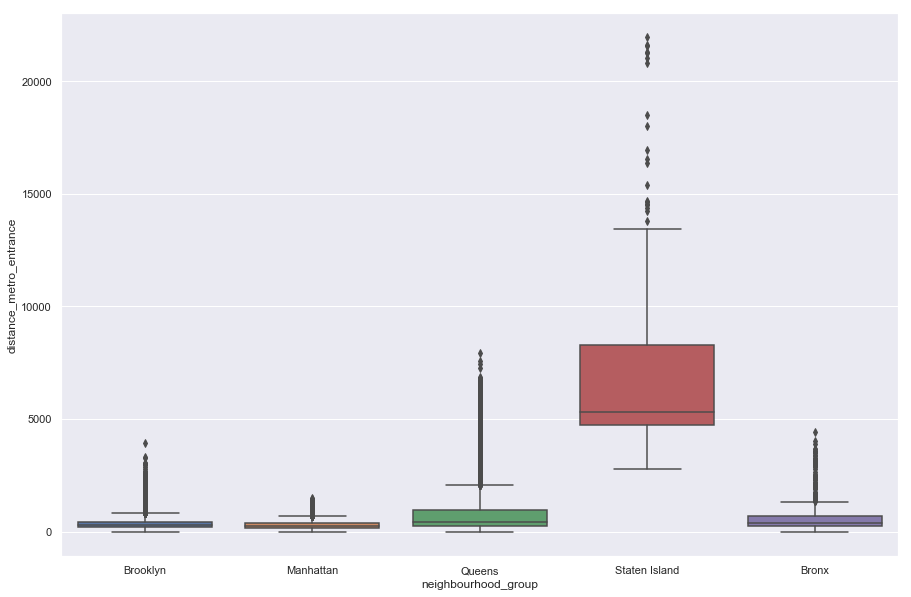

In [69]:
plt.figure(figsize=(15,10))
sns.boxplot("neighbourhood_group", "distance_metro_entrance", data=metro_distance)

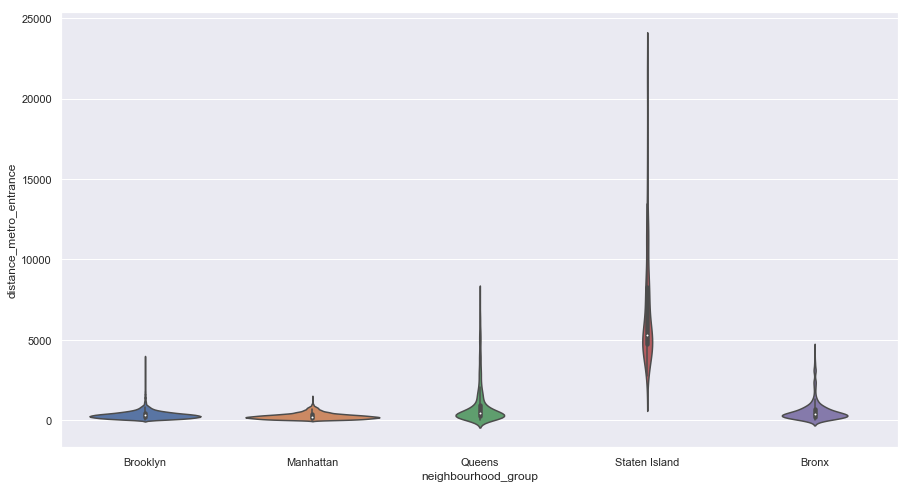

In [70]:
plt.figure(figsize=(15,8))
sns.violinplot("neighbourhood_group", "distance_metro_entrance", data=metro_distance)

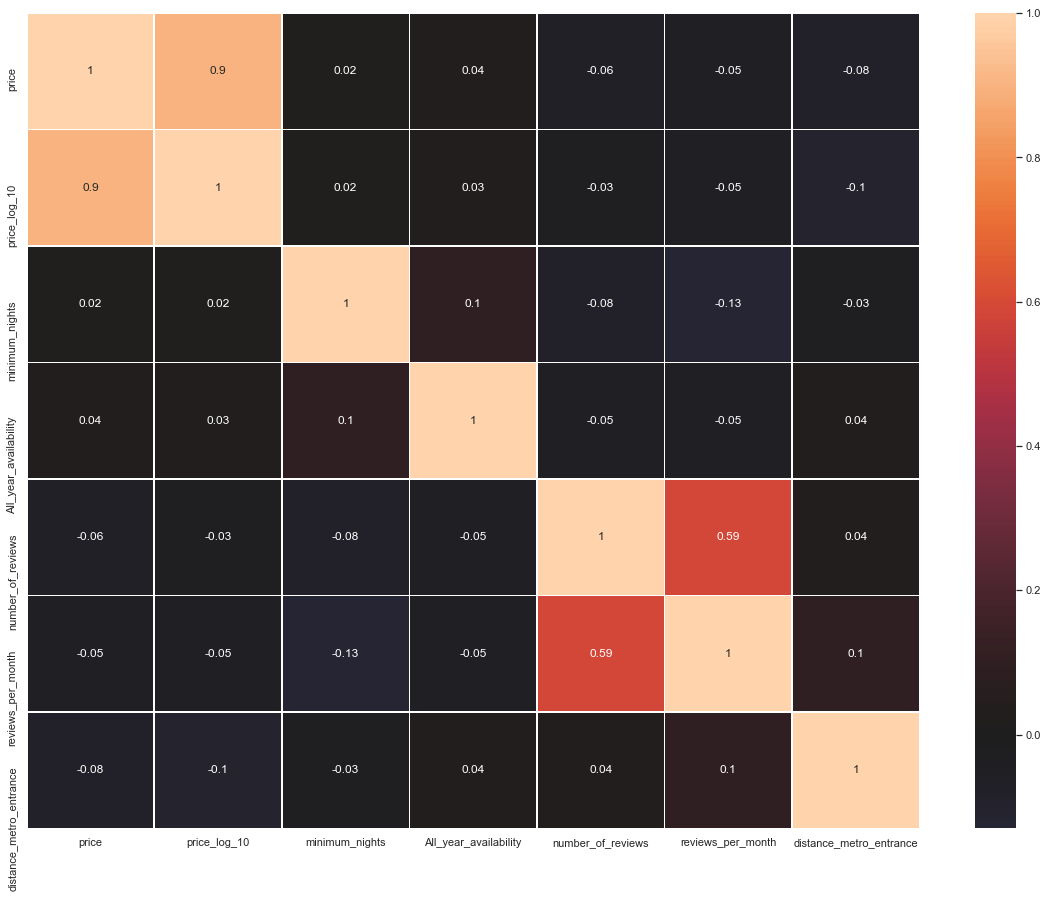

In [72]:
plt.figure(i,figsize=(20,15))
correlation_matrix = metro_distance[["price",'price_log_10',"minimum_nights","All_year_availability","number_of_reviews","reviews_per_month","distance_metro_entrance"]].corr().round(2)
sns.heatmap(data=correlation_matrix ,center=0 , linewidths=.7, annot=True)

### realation between price_log_10 & distance_metro_entrance

In [73]:
stats.stats.spearmanr(metro_distance['distance_metro_entrance'],metro_distance['price_log_10'])

SpearmanrResult(correlation=-0.11776614786163854, pvalue=2.6387552238651565e-149)

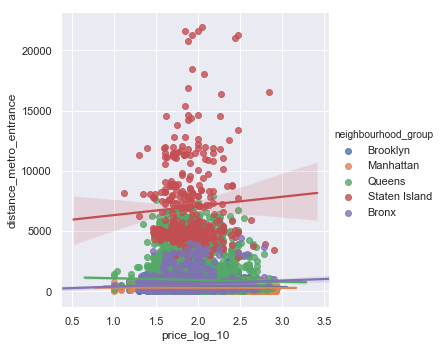

In [88]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("price_log_10","distance_metro_entrance", hue="neighbourhood_group", data=metro_distance)

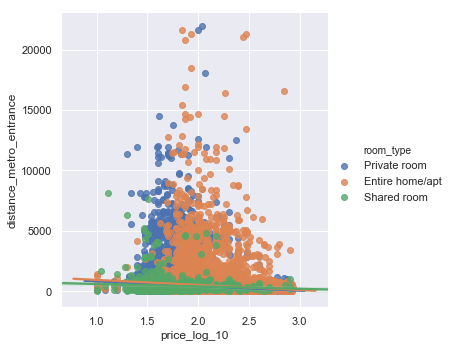

In [90]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("price_log_10","distance_metro_entrance", hue="room_type", data=metro_distance)

### realation between minimum_nights & distance_metro_entrance

In [74]:
stats.stats.spearmanr(metro_distance['distance_metro_entrance'],metro_distance['minimum_nights'])

SpearmanrResult(correlation=-0.04373505602652124, pvalue=5.655411744257526e-22)

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("minimum_nights","distance_metro_entrance", hue="neighbourhood_group", data=metro_distance)

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("minimum_nights","distance_metro_entrance", hue="room_type", data=metro_distance)

Test for Normal Distribution for  Brooklyn
------------------------------------------
NormaltestResult(statistic=73072.22768394007, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Manhattan
------------------------------------------
NormaltestResult(statistic=73072.22768394007, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Queens
------------------------------------------
NormaltestResult(statistic=73072.22768394007, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Staten Island
------------------------------------------
NormaltestResult(statistic=73072.22768394007, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Bronx
------------------------------------------
NormaltestResult(statistic=73072.22768394007, pvalue=0.0)
------------------------------------------


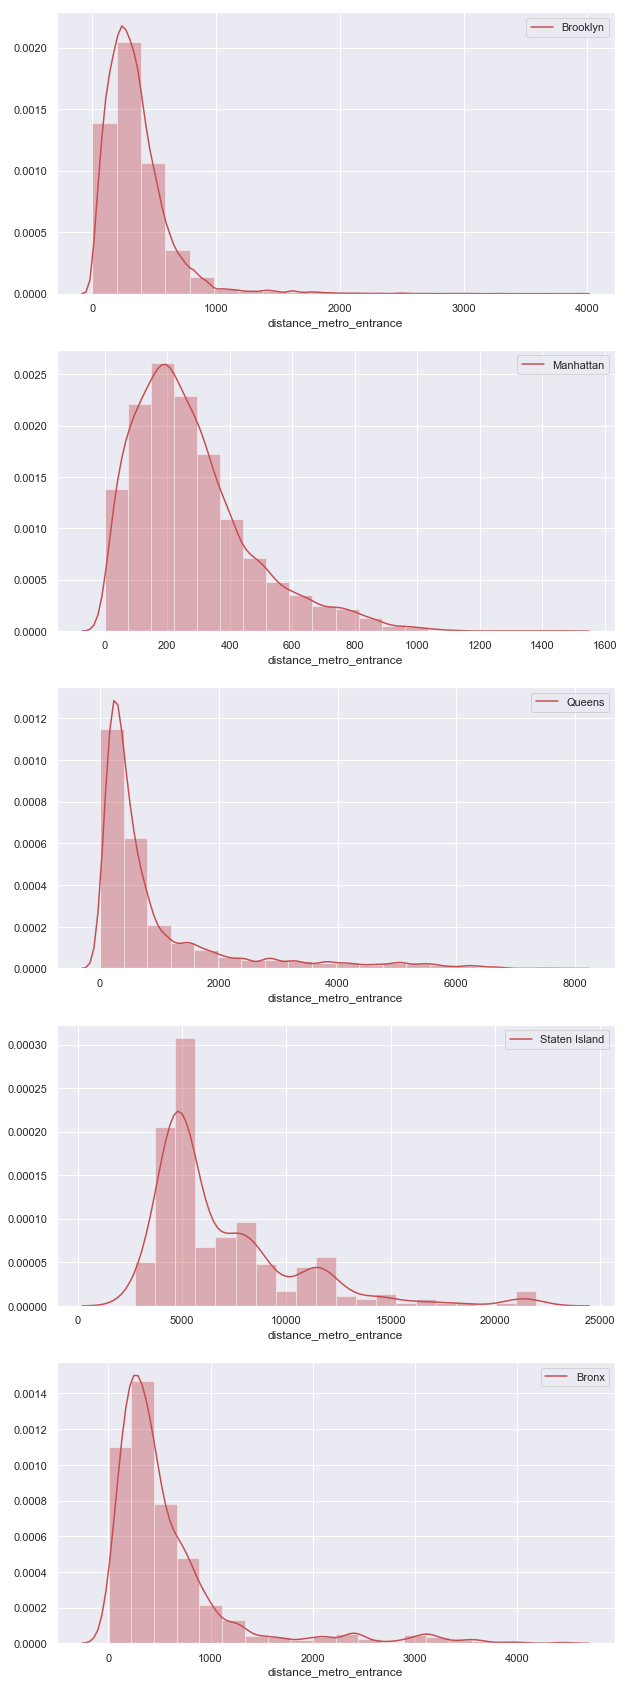

In [76]:
f = plt.figure(figsize=(10,30))
for i, groups in enumerate(metro_distance.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sns.distplot(metro_distance.distance_metro_entrance[metro_distance['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=20)
    print('Test for Normal Distribution for ' , groups)
    print('------------------------------------------')
    print(stats.normaltest(metro_distance["distance_metro_entrance"]))
    print('------------------------------------------')

### find distance from NY centeral Station

In [22]:
data1['distance_from_central_station'] = 0.0

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
data1.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   price_log_e  price_log_10  All_year_availability  \
0     5.003946      2.173186                      1   
1     5.416100      2.352183                      0   
2     5.010635      2.176091                      1   
3     4.488636      1.949390                      0   
4     4.382027      1.903090                      0   

   distance_from_central_station  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

In [28]:
# central_station_latitude = 40.7527
# central_station_longitude = -73.9772
# origin = (central_station_latitude,central_station_longitude)
# for i in range(len(data1)):
#     Latitude = data1['latitude'][i]
#     Longitude = data1['longitude'][i]
#     dist = (Latitude,Longitude)
#     min_distance = geodesic(origin, dist).meters
#     data1['distance_from_central_station'][i] = round(min_distance, 2)
#     if i%100 == 0:
#         print(i,round(min_distance, 2))

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0 11690.5
100 8082.6
200 8709.89
300 3064.37
400 9427.19
500 2176.71
600 3242.34
700 7799.6
800 6343.69
900 556.23
1000 3563.01
1100 19786.21
1200 8415.02
1300 6868.77
1400 5907.22
1500 5497.24
1600 12191.92
1700 7039.78
1800 6708.95
1900 7012.13
2000 623.87
2100 9091.08
2200 3967.23
2300 5730.38
2400 2515.38
2500 4455.03
2600 3121.35
2700 7148.79
2800 3868.19
2900 4771.18
3000 6095.92
3100 8359.34
3200 4638.43
3300 3521.19
3400 4493.37
3500 7630.05
3600 7520.14
3700 1582.33
3800 9619.98
3900 5617.21
4000 7239.19
4100 6695.47
4200 2943.64
4300 7010.74
4400 4156.64
4500 3557.57
4600 4265.87
4700 3971.08
4800 4444.77
4900 10032.44
5000 1626.94
5100 10664.78
5200 8916.25
5300 7773.03
5400 12351.5
5500 4132.41
5600 12023.42
5700 3287.68
5800 10923.02
5900 3838.74
6000 9807.94
6100 7429.67
6200 4225.8
6300 7628.74
6400 6107.52
6500 7113.43
6600 8100.33
6700 8173.96
6800 8643.58
6900 3322.97
7000 15302.07
7100 8192.08
7200 13853.47
7300 1978.61
7400 2996.45
7500 8402.52
7600 3815.64
7700 841

In [29]:
data1.to_csv('distance_from_central_station.csv')

In [ ]:
# data1 = pd.read_csv('distance_from_central_station.csv')

 ### realation between price_log_10 & distance_from_central_station

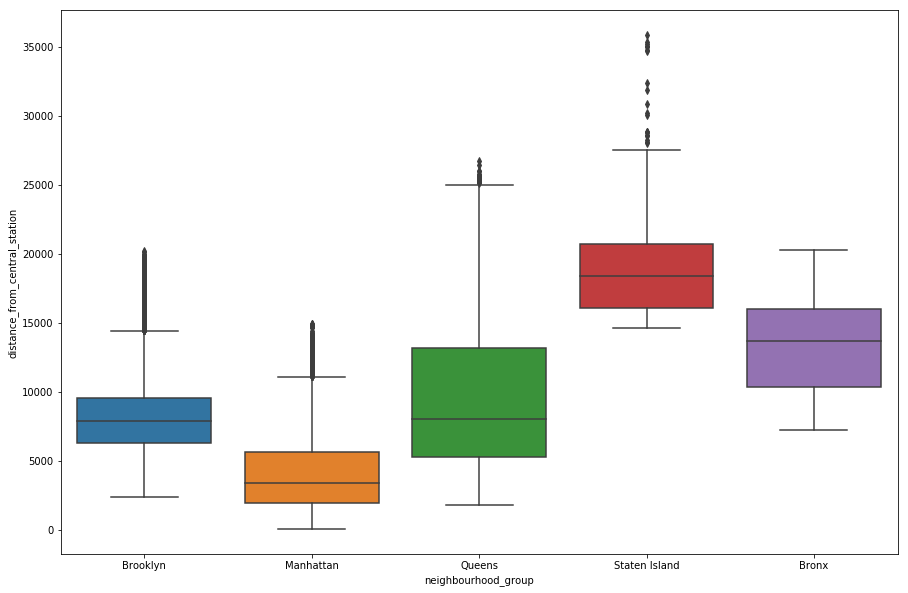

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot("neighbourhood_group", "distance_from_central_station", data=data1)

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


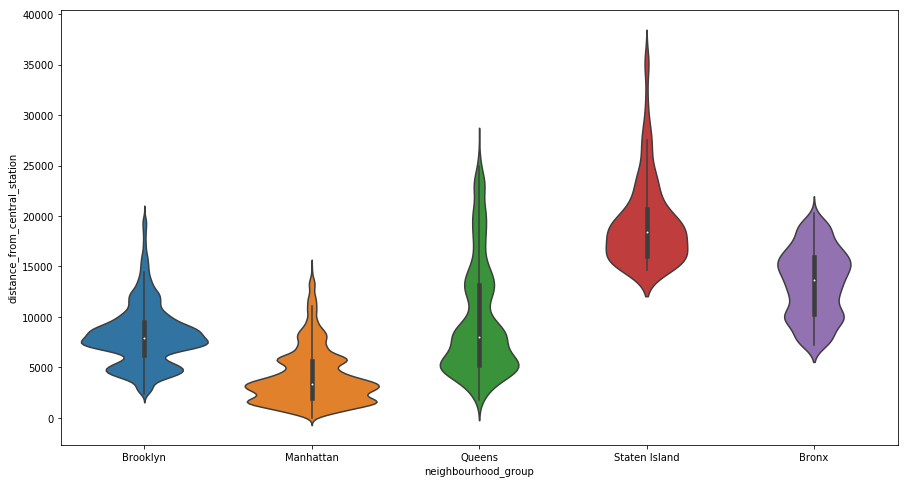

In [31]:
plt.figure(figsize=(15,8))
sns.violinplot("neighbourhood_group", "distance_from_central_station", data=data1)

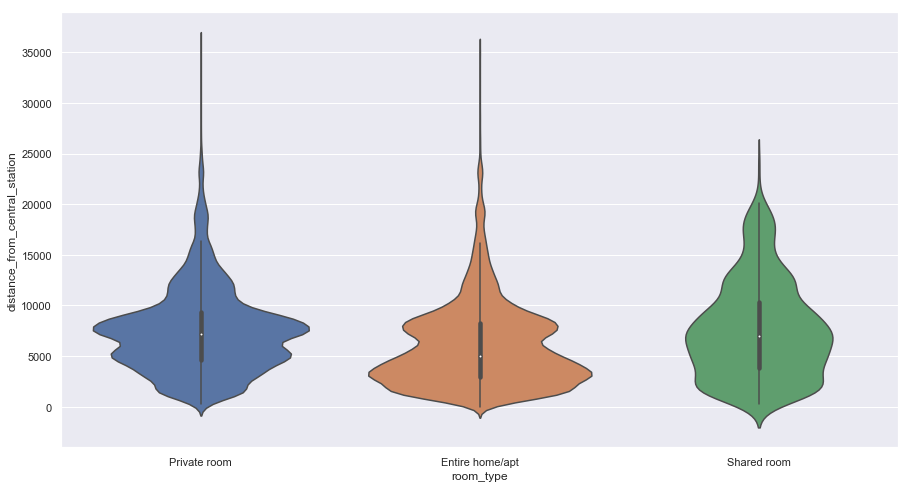

In [39]:
plt.figure(figsize=(15,8))
sns.violinplot("room_type", "distance_from_central_station", data=data1)

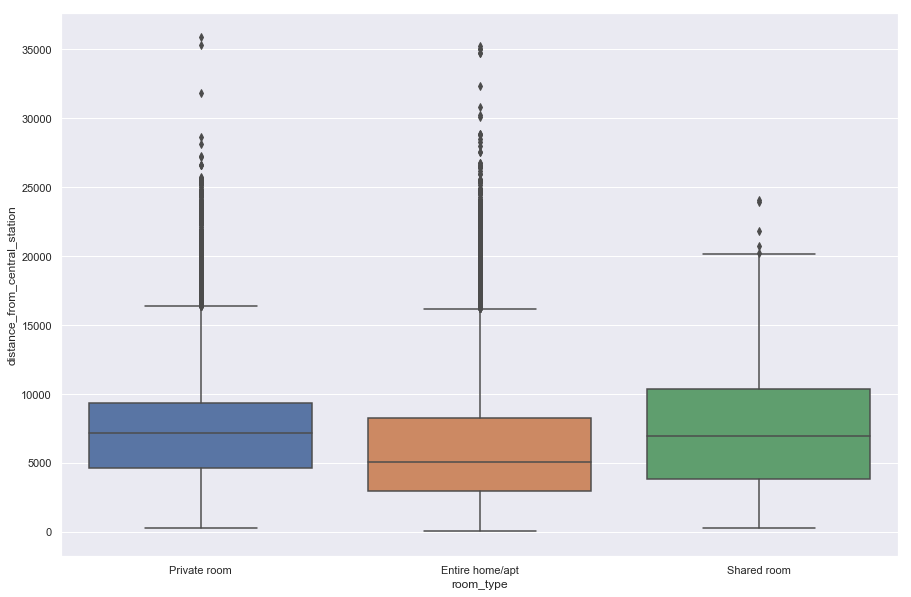

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot("room_type", "distance_from_central_station", data=data1)

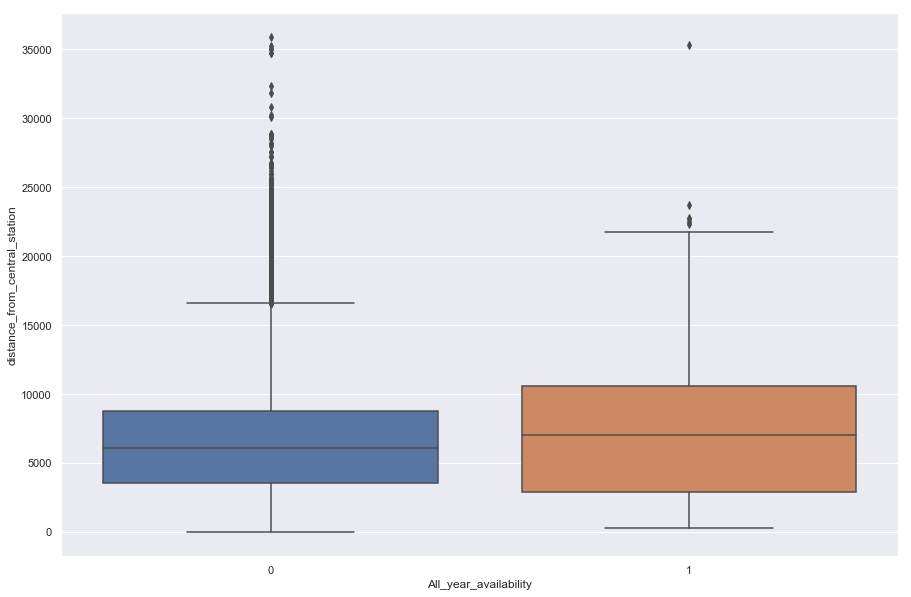

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot("All_year_availability", "distance_from_central_station", data=data1)

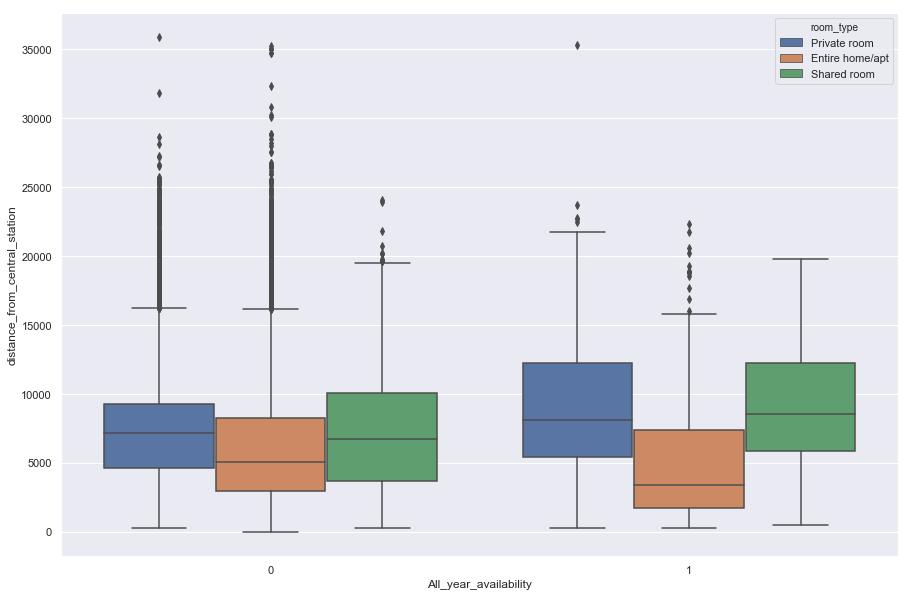

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot("All_year_availability", "distance_from_central_station",hue = 'room_type', data=data1)

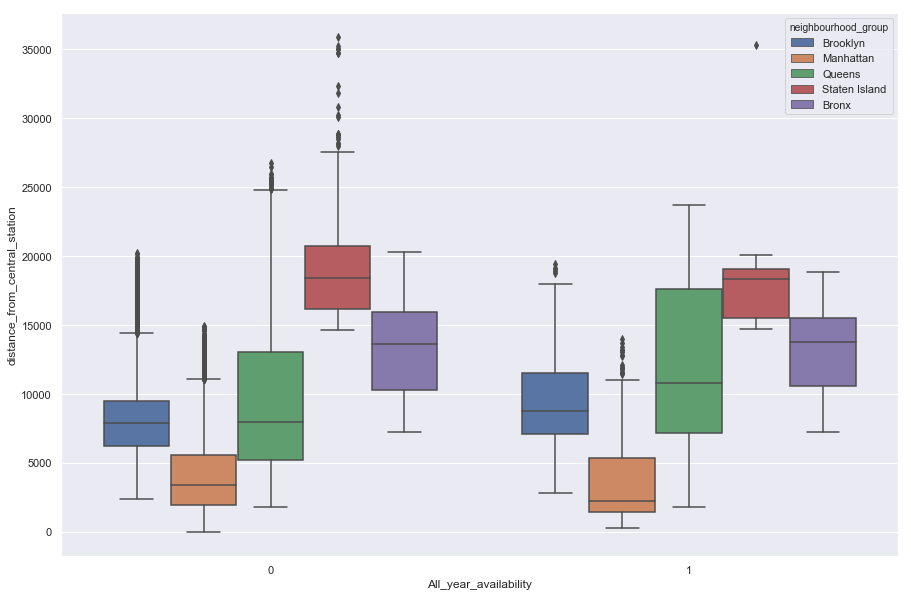

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot("All_year_availability", "distance_from_central_station",hue = 'neighbourhood_group', data=data1)

In [32]:
stats.stats.spearmanr(data1['distance_from_central_station'],data1['price_log_10'])

SpearmanrResult(correlation=-0.45102956905283764, pvalue=0.0)

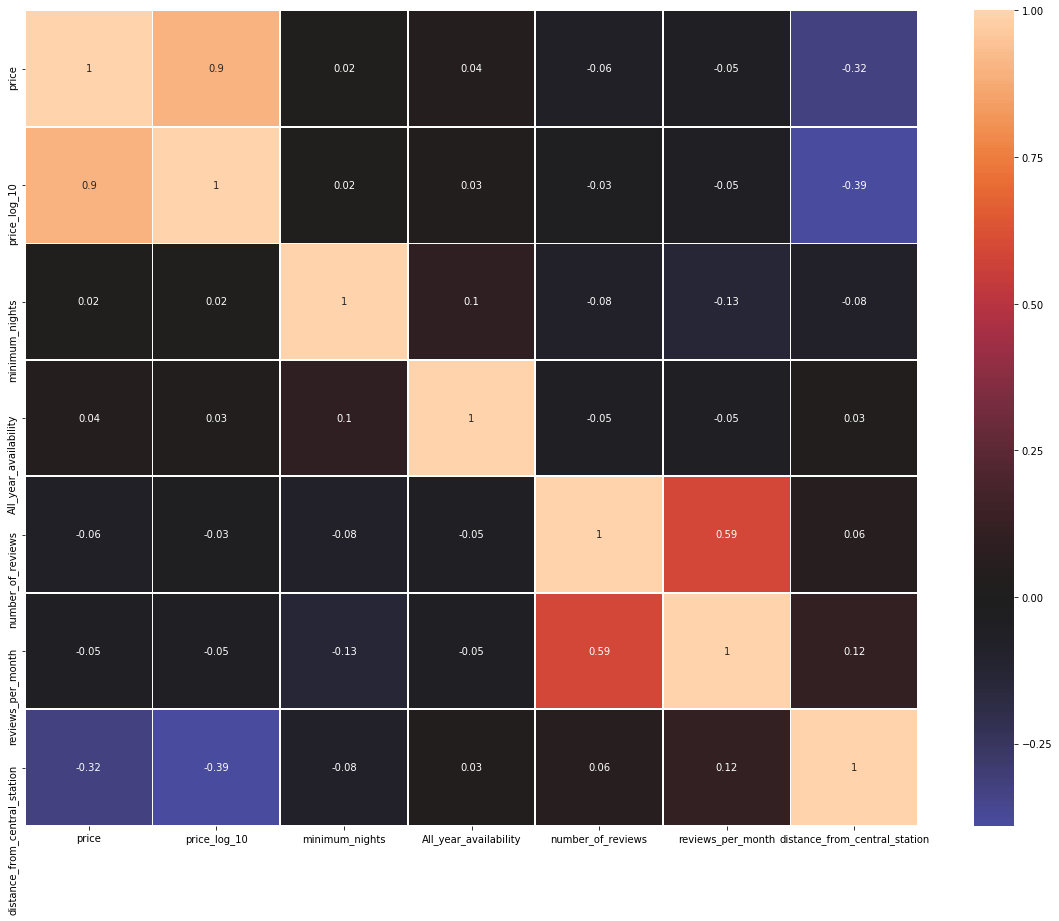

In [33]:
plt.figure(i,figsize=(20,15))
correlation_matrix = data1[["price",'price_log_10',"minimum_nights","All_year_availability","number_of_reviews","reviews_per_month","distance_from_central_station"]].corr().round(2)
sns.heatmap(data=correlation_matrix ,center=0 , linewidths=.7, annot=True)

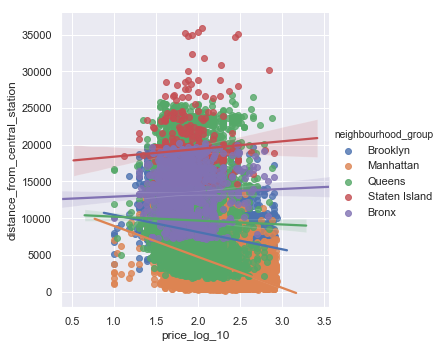

In [34]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("price_log_10","distance_from_central_station", hue="neighbourhood_group", data=data1)

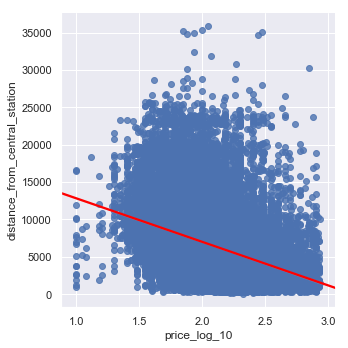

In [47]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("price_log_10","distance_from_central_station",line_kws={'color': 'red'}, data=data1)

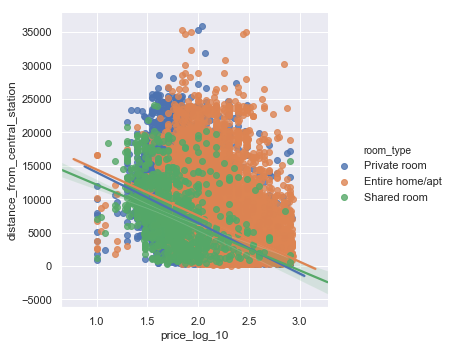

In [35]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("price_log_10","distance_from_central_station", hue="room_type", data=data1)

Test for Normal Distribution for  Brooklyn
------------------------------------------
NormaltestResult(statistic=9580.58124911193, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Manhattan
------------------------------------------
NormaltestResult(statistic=9580.58124911193, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Queens
------------------------------------------
NormaltestResult(statistic=9580.58124911193, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Staten Island
------------------------------------------
NormaltestResult(statistic=9580.58124911193, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Bronx
------------------------------------------
NormaltestResult(statistic=9580.58124911193, pvalue=0.0)
------------------------------------------


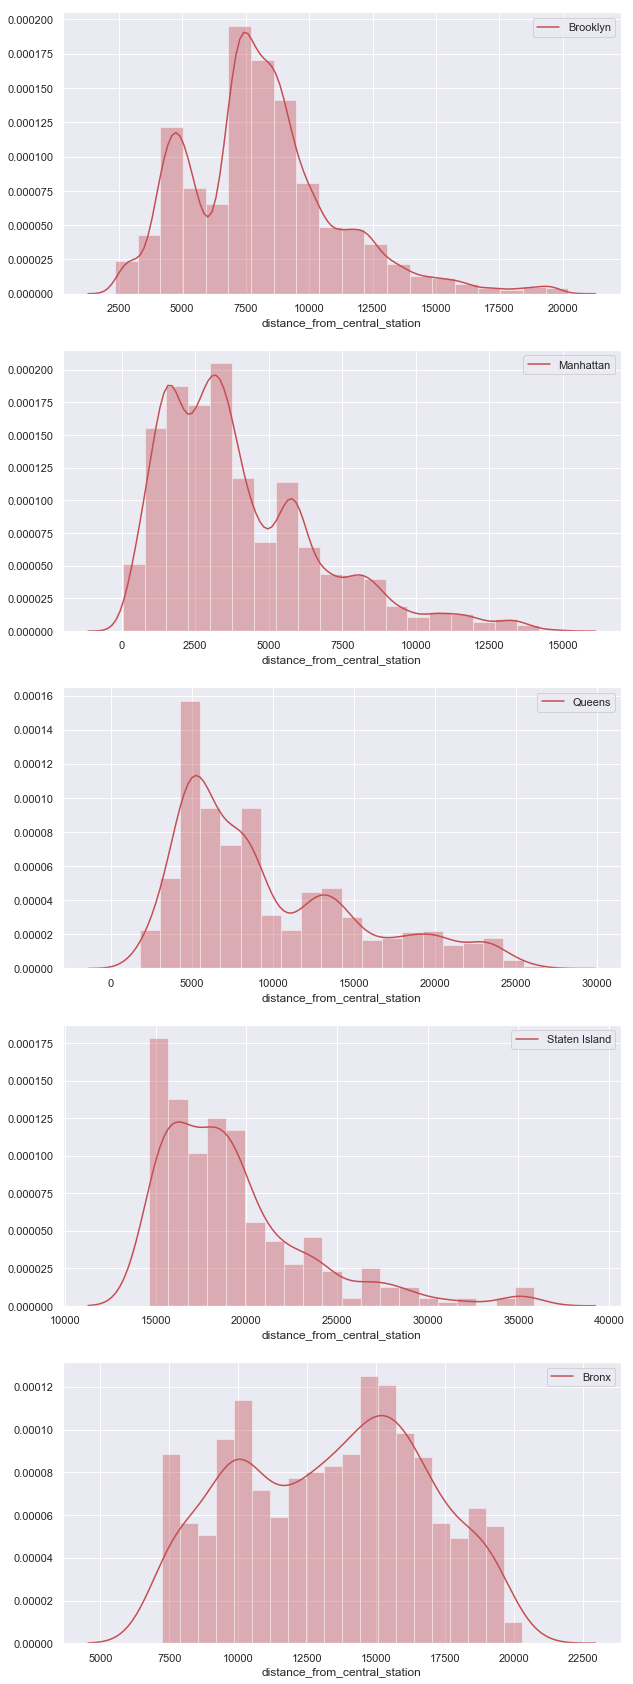

In [38]:
f = plt.figure(figsize=(10,30))
for i, groups in enumerate(data1.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sns.distplot(data1.distance_from_central_station[data1['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=20)
    print('Test for Normal Distribution for ' , groups)
    print('------------------------------------------')
    print(stats.normaltest(data1["distance_from_central_station"]))
    print('------------------------------------------')

### find distance from JFK airport

In [16]:
data1['distance_from_JFK_airport'] = 0.0

In [17]:
data1.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   distance_from_JFK_airport  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0

In [18]:
JFK_airport_latitude = 40.6413
JFK_airport_longitude = -73.7781
origin = (JFK_airport_latitude,JFK_airport_longitude)
for i in range(len(data1)):
    Latitude = data1['latitude'][i]
    Longitude = data1['longitude'][i]
    dist = (Latitude,Longitude)
    min_distance = geodesic(origin, dist).meters
    data1['distance_from_JFK_airport'][i] = round(min_distance, 2)
    if i%100 == 0:
        print(i,round(min_distance, 2))

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0 16446.84
100 24909.5
200 12206.26
300 23141.6
400 18392.71
500 21407.2
600 19785.87
700 24260.42
800 23794.28
900 21119.74
1000 20431.58
1100 4168.14
1200 16640.3
1300 14180.31
1400 23445.93
1500 23689.04
1600 18786.53
1700 15320.56
1800 16703.1
1900 24068.35
2000 20309.56
2100 12069.47
2200 18026.88
2300 15628.38
2400 20402.08
2500 17929.21
2600 21560.37
2700 15276.03
2800 18456.68
2900 17461.27
3000 22921.4
3100 13475.57
3200 16793.49
3300 20715.96
3400 17183.65
3500 14051.14
3600 23911.76
3700 20285.75
3800 15481.67
3900 17455.48
4000 23620.65
4100 17206.49
4200 21522.51
4300 15422.55
4400 17655.19
4500 20979.0
4600 19952.17
4700 23078.63
4800 23235.91
4900 17600.61
5000 22025.22
5100 12216.11
5200 13080.83
5300 14385.22
5400 19984.92
5500 20671.44
5600 16437.5
5700 20473.4
5800 14506.56
5900 17159.09
6000 18020.5
6100 14481.05
6200 17391.92
6300 15190.27
6400 17926.49
6500 18387.14
6600 16803.21
6700 16697.2
6800 15672.82
6900 20905.59
7000 25249.17
7100 19595.54
7200 28636.36
73

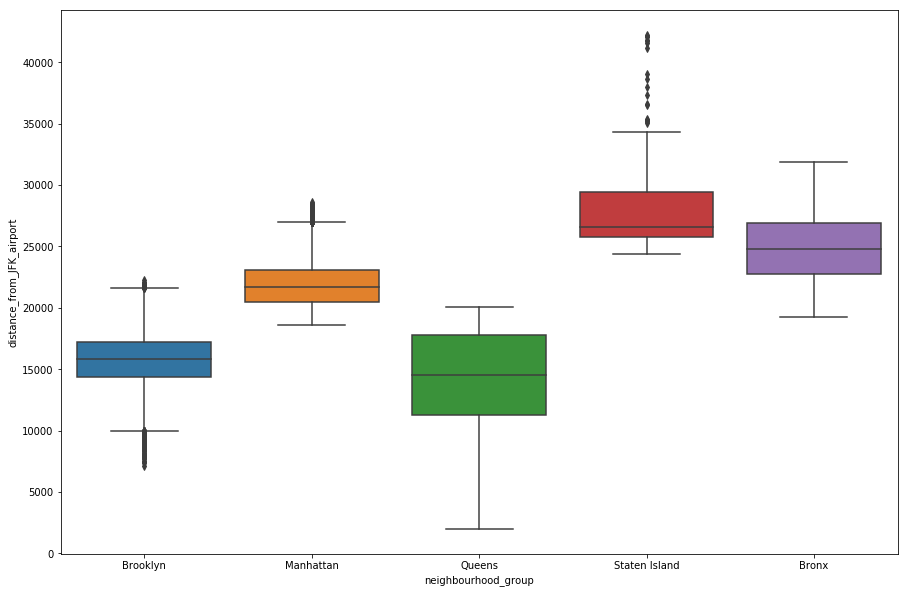

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot("neighbourhood_group", "distance_from_JFK_airport", data=data1)

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


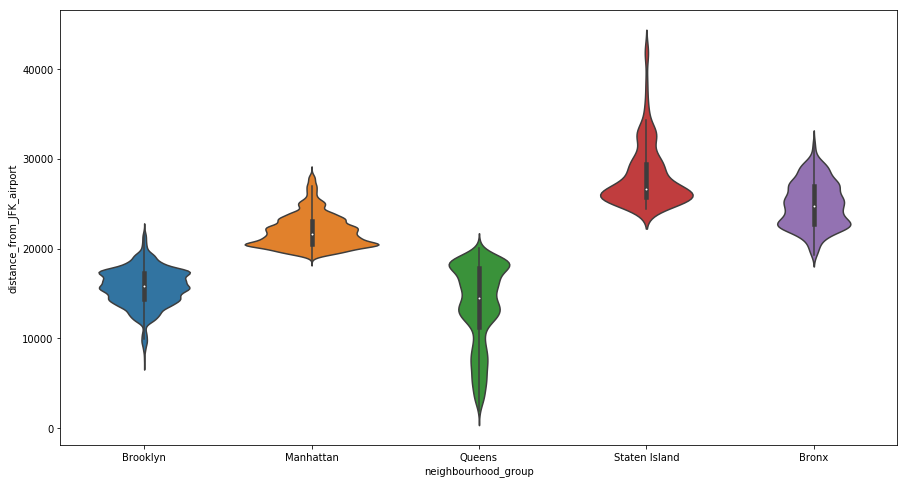

In [20]:
plt.figure(figsize=(15,8))
sns.violinplot("neighbourhood_group", "distance_from_JFK_airport", data=data1)

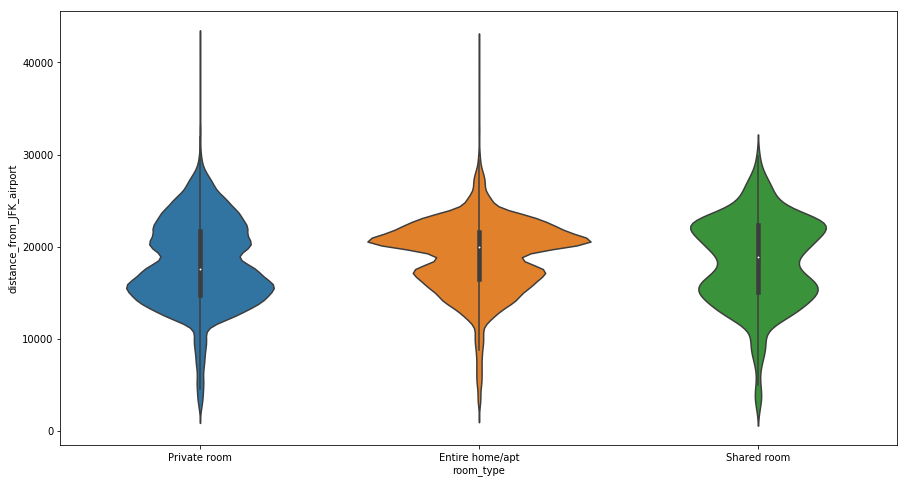

In [21]:
plt.figure(figsize=(15,8))
sns.violinplot("room_type", "distance_from_JFK_airport", data=data1)

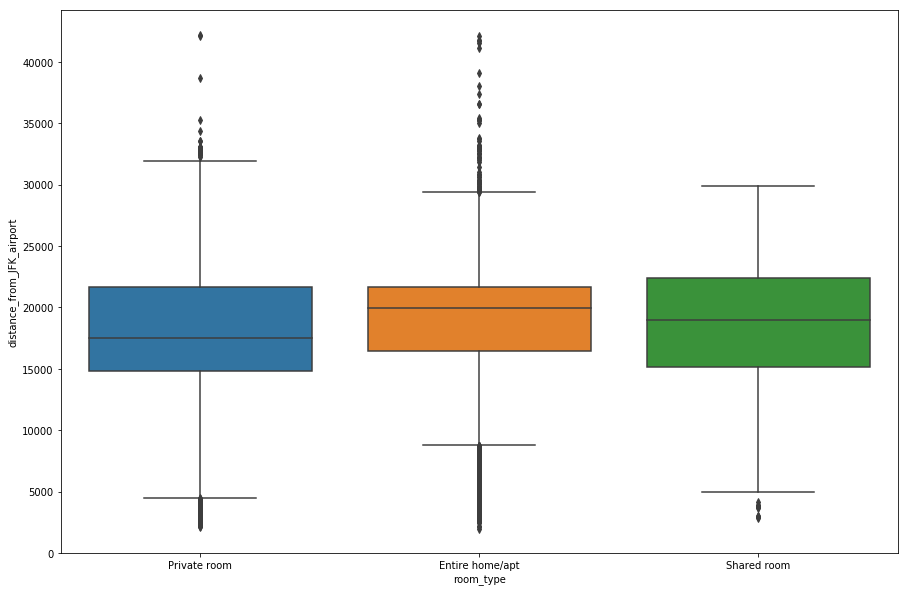

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot("room_type", "distance_from_JFK_airport", data=data1)

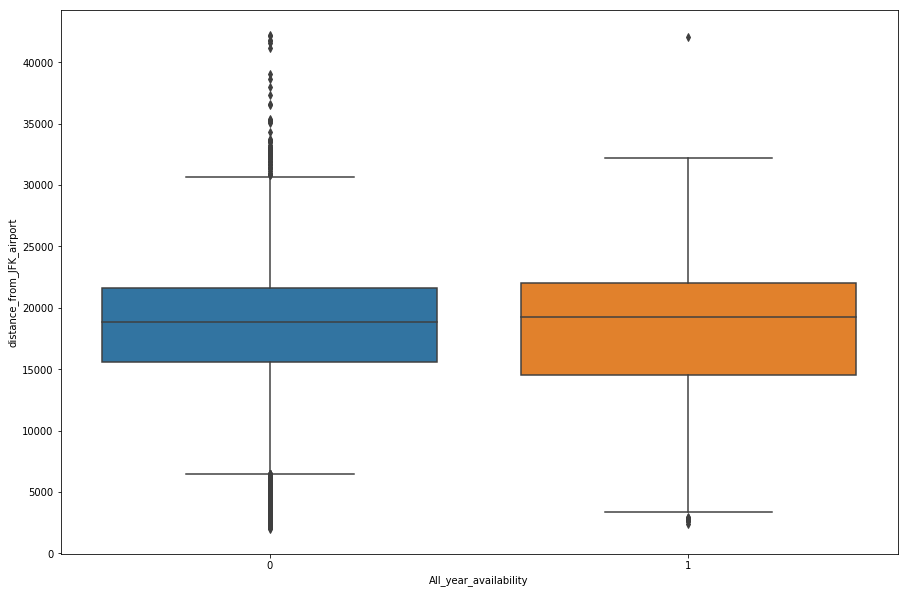

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot("All_year_availability", "distance_from_JFK_airport", data=data1)

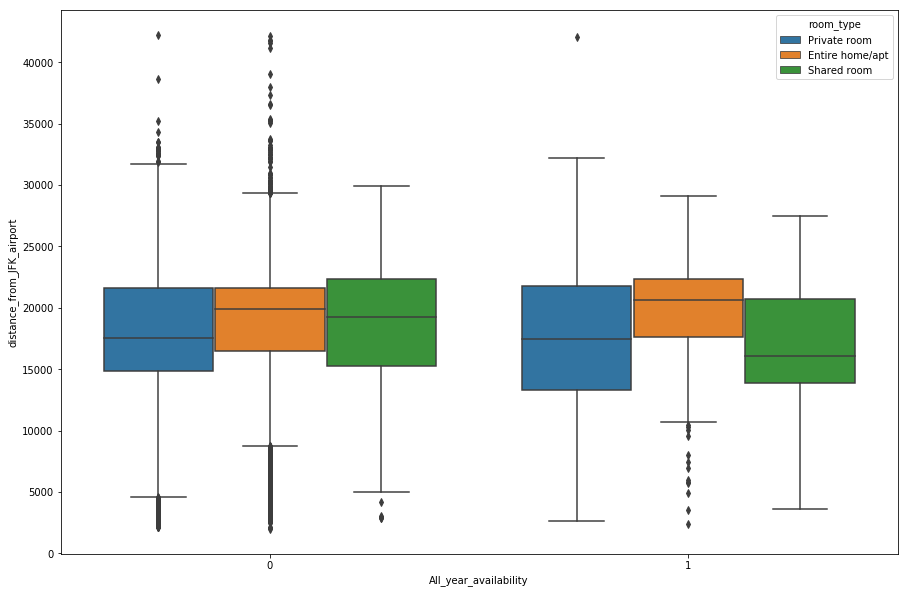

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot("All_year_availability", "distance_from_JFK_airport",hue = 'room_type', data=data1)

Test for Normal Distribution for  Brooklyn
------------------------------------------
NormaltestResult(statistic=1402.642027819057, pvalue=2.631198520641724e-305)
------------------------------------------
Test for Normal Distribution for  Manhattan
------------------------------------------
NormaltestResult(statistic=1402.642027819057, pvalue=2.631198520641724e-305)
------------------------------------------
Test for Normal Distribution for  Queens
------------------------------------------
NormaltestResult(statistic=1402.642027819057, pvalue=2.631198520641724e-305)
------------------------------------------
Test for Normal Distribution for  Staten Island
------------------------------------------
NormaltestResult(statistic=1402.642027819057, pvalue=2.631198520641724e-305)
------------------------------------------
Test for Normal Distribution for  Bronx
------------------------------------------
NormaltestResult(statistic=1402.642027819057, pvalue=2.631198520641724e-305)
------------

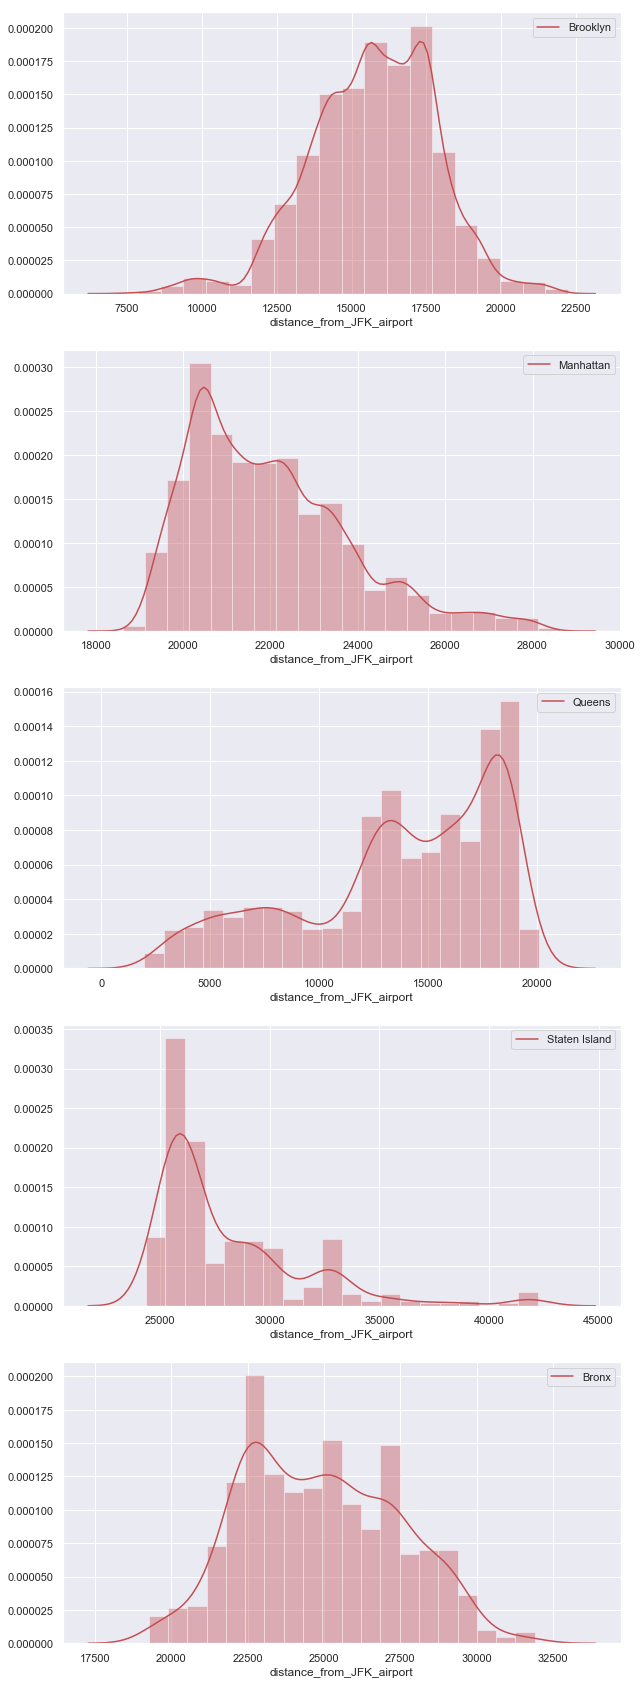

In [35]:
f = plt.figure(figsize=(10,30))
for i, groups in enumerate(data1.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sns.distplot(data1.distance_from_JFK_airport[data1['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=20)
    print('Test for Normal Distribution for ' , groups)
    print('------------------------------------------')
    print(stats.normaltest(data1["distance_from_JFK_airport"]))
    print('------------------------------------------')

### realation between minimum_nights & distance_from_JFK_airport

In [38]:
stats.stats.spearmanr(data1['distance_from_JFK_airport'],data1['minimum_nights'])

SpearmanrResult(correlation=0.0671495495430568, pvalue=1.3828493876409562e-49)

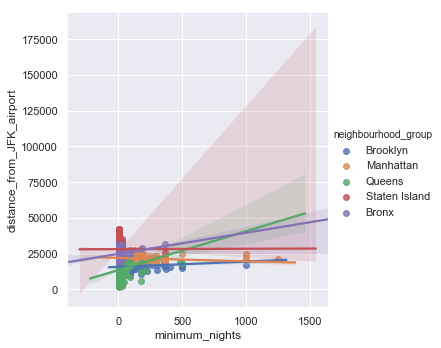

In [40]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("minimum_nights","distance_from_JFK_airport", hue="neighbourhood_group", data=data1)

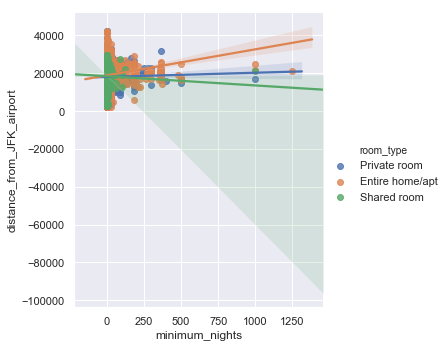

In [41]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("minimum_nights","distance_from_JFK_airport", hue="room_type", data=data1)

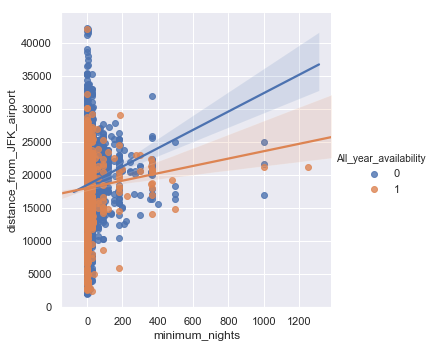

In [43]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("minimum_nights","distance_from_JFK_airport", hue="All_year_availability", data=data1)

### realation between price_log_10 & distance_from_JFK_airport

In [30]:
stats.stats.spearmanr(data1['distance_from_JFK_airport'],data1['price_log_10'])

SpearmanrResult(correlation=0.27052738112113833, pvalue=0.0)

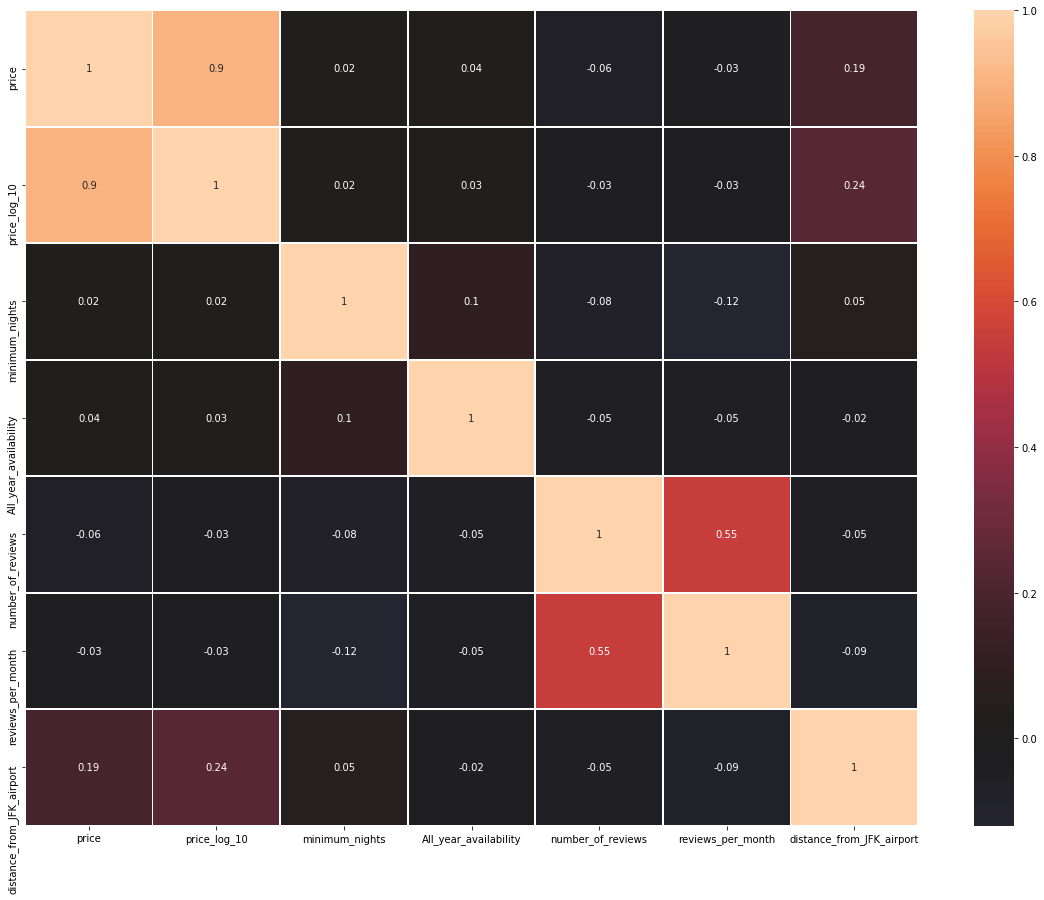

In [32]:
plt.figure(i,figsize=(20,15))
correlation_matrix = data1[["price",'price_log_10',"minimum_nights","All_year_availability","number_of_reviews","reviews_per_month","distance_from_JFK_airport"]].corr().round(2)
sns.heatmap(data=correlation_matrix ,center=0 , linewidths=.7, annot=True)

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


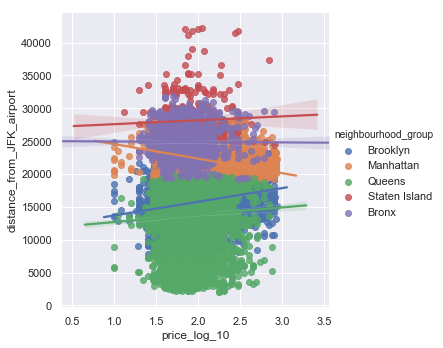

In [33]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("price_log_10","distance_from_JFK_airport", hue="neighbourhood_group", data=data1)

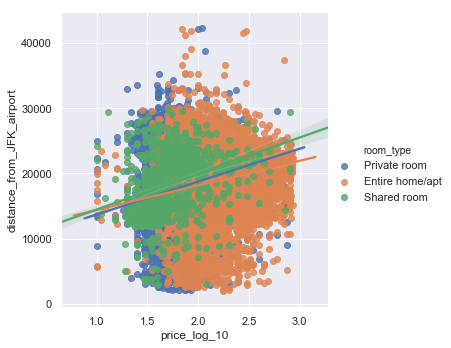

In [34]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("price_log_10","distance_from_JFK_airport", hue="room_type", data=data1)